Feature Description

ph: pH of 1. water (0 to 14).

Hardness: Capacity of water to precipitate soap in mg/L.

Solids: Total dissolved solids in ppm.

Chloramines: Amount of Chloramines in ppm.

Sulfate: Amount of Sulfates dissolved in mg/L.

Conductivity: Electrical conductivity of water in μS/cm.

Organic_carbon: Amount of organic carbon in ppm.

Trihalomethanes: Amount of Trihalomethanes in μg/L.

Turbidity: Measure of light emiting property of water in NTU.

Potability: Indicates if water is safe for human consumption. Potable - 1 and Not potable - 0

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
from collections import Counter
import warnings
from scipy.stats import shapiro, skew

# Visualization Libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.figure_factory as ff
from matplotlib.colors import LinearSegmentedColormap

# Data Pre-processing Libraries
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from imblearn.over_sampling import SMOTE

# Modelling Libraries
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier, Perceptron
from sklearn.svm import SVC, NuSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Evaluation & Metrics Libraries
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# Feature Selection Libraries
from sklearn.feature_selection import RFE

# Pipeline
from sklearn.pipeline import Pipeline

# Hyperparameter Tuning Libraries
import optuna

# Suppress warnings
warnings.filterwarnings('ignore')


Colors

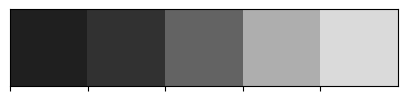

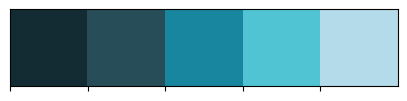

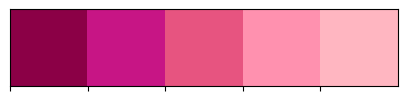

In [2]:
colors_dark = ["#1F1F1F", "#313131", '#636363', '#AEAEAE', '#DADADA']
colors_blue = ["#132C33", "#264D58", '#17869E', '#51C4D3', '#B4DBE9']
colors_pink = ['#8B0046', '#C71585', '#E75480', '#FF91AF', '#FFB6C1']


sns.palplot(colors_dark)
sns.palplot(colors_blue)
sns.palplot(colors_pink)


Dataset Importing

In [3]:
df=pd.read_csv('./water_potability.csv')
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
# from pandas_profiling import ProfileReport


# profile = ProfileReport(df, title="Profiling Report")
# profile

In [5]:
df.head()


ph    Hardness        Solids  Chloramines     Sulfate  Conductivity  \
0       NaN  204.890455  20791.318981     7.300212  368.516441    564.308654   
1  3.716080  129.422921  18630.057858     6.635246         NaN    592.885359   
2  8.099124  224.236259  19909.541732     9.275884         NaN    418.606213   
3  8.316766  214.373394  22018.417441     8.059332  356.886136    363.266516   
4  9.092223  181.101509  17978.986339     6.546600  310.135738    398.410813   

   Organic_carbon  Trihalomethanes  Turbidity  Potability  
0       10.379783        86.990970   2.963135           0  
1       15.180013        56.329076   4.500656           0  
2       16.868637        66.420093   3.055934           0  
3       18.436524       100.341674   4.628771           0  
4       11.558279        31.997993   4.075075           0

In [6]:
# Descriptive statistics
print("Descriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                ph     Hardness        Solids  Chloramines      Sulfate  \
count  2785.000000  3276.000000   3276.000000  3276.000000  2495.000000   
mean      7.080795   196.369496  22014.092526     7.122277   333.775777   
std       1.594320    32.879761   8768.570828     1.583085    41.416840   
min       0.000000    47.432000    320.942611     0.352000   129.000000   
25%       6.093092   176.850538  15666.690297     6.127421   307.699498   
50%       7.036752   196.967627  20927.833607     7.130299   333.073546   
75%       8.062066   216.667456  27332.762127     8.114887   359.950170   
max      14.000000   323.124000  61227.196008    13.127000   481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity   Potability  
count   3276.000000     3276.000000      3114.000000  3276.000000  3276.000000  
mean     426.205111       14.284970        66.396293     3.966786     0.390110  
std       80.824064        3.308162        16.175008     

Descriptive visualizations

Potability

In [7]:

d = df['Potability'].value_counts()

fig = px.pie(d, values='count', names=['Not Potable', 'Potable'], hole=0.4, opacity=0.8,
             color_discrete_sequence=[colors_pink[3], colors_blue[3]],
             labels={'label': 'Potability', 'count': 'No. Of Samples'})

fig.update_layout(
    title=dict(text='Q. How many samples of water are Potable?',x=0.47,y=0.98,
               font=dict(color=colors_dark[2],size=20)),
    legend=dict(x=0.37,y=-0.05,orientation='h',traceorder='reversed'),
    hoverlabel=dict(bgcolor='white'))

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

Potability
0    1998
1    1278
Name: count, dtype: int64


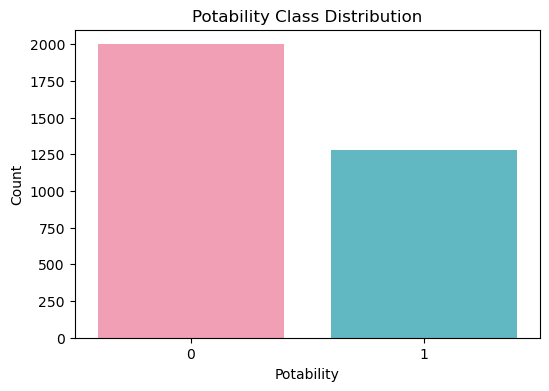

In [8]:

# Check for class imbalance in Potability
potability_counts = df['Potability'].value_counts()
print(potability_counts)

# Plot the distribution of Potability
plt.figure(figsize=(6, 4))
sns.barplot(x=potability_counts.index, y=potability_counts.values, palette=[colors_pink[3], colors_blue[3]])
plt.title("Potability Class Distribution")
plt.xlabel("Potability")
plt.ylabel("Count")
plt.show()

Our dataset is overall balanced.

Water Hardness

In [9]:
fig = px.histogram(df,x='Hardness',y=Counter(df['Hardness']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=151, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=301, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)
fig.add_vline(x=76, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<76 mg/L is<br> considered soft',x=40,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 76 and 150<br> (mg/L) is<br>moderately hard',x=113,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='Between 151 and 300 (mg/L)<br> is considered hard',x=250,y=130,showarrow=False,font_size=9)
fig.add_annotation(text='>300 mg/L is<br> considered very hard',x=340,y=130,showarrow=False,font_size=9)

fig.update_layout(
    title=dict(text='Hardness Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Hardness (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Water PH level

In [10]:
fig = px.histogram(df,x='ph',y=Counter(df['ph']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=7, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<7 is Acidic',x=4,y=70,showarrow=False,font_size=10)
fig.add_annotation(text='>7 is Basic',x=10,y=70,showarrow=False,font_size=10)


fig.update_layout(
    title=dict(text='pH Level Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='pH Level',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

TDS: TDS means concentration of dissolved particles or solids in water. TDS comprises of inorganic salts such as calcium, magnesium, chlorides, sulfates, bicarbonates, etc, along with many more inorganic compounds that easily dissolve in water.

In [11]:
fig = px.histogram(df,x='Solids',y=Counter(df['Solids']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.update_layout(
    title=dict(text='Distribution Of Total Dissolved Solids',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Dissolved Solids (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Chloramines: Chloramines (also known as secondary disinfection) are disinfectants used to treat drinking water and they:

Are most commonly formed when ammonia is added to chlorine to treat drinking water.
Provide longer-lasting disinfection as the water moves through pipes to consumers.
Chloramines have been used by water utilities since the 1930s.

In [12]:
fig = px.histogram(df,x='Chloramines',y=Counter(df['Chloramines']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=4, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<4 ppm is considered<br> safe for drinking',x=1.8,y=90,showarrow=False)

fig.update_layout(
    title=dict(text='Chloramines Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Chloramines (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Sulfate: Sulfate (SO4) can be found in almost all natural water. The origin of most sulfate compounds is the oxidation of sulfite ores, the presence of shales, or the industrial wastes. Sulfate is one of the major dissolved components of rain. High concentrations of sulfate in the water we drink can have a laxative effect when combined with calcium and magnesium, the two most common constituents of hardness.

In [13]:
fig = px.histogram(df,x='Sulfate',y=Counter(df['Sulfate']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=250, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<250 mg/L is considered<br> safe for drinking',x=175,y=90,showarrow=False)

fig.update_layout(
    title=dict(text='Sulfate Distribution',x=0.53,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Sulfate (mg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Conductivity: Conductivity is a measure of the ability of water to pass an electrical current. Because dissolved salts and other inorganic chemicals conduct electrical current, conductivity increases as salinity increases. Organic compounds like oil do not conduct electrical current very well and therefore have a low conductivity when in water. Conductivity is also affected by temperature: the warmer the water, the higher the conductivity.

In [14]:
fig = px.histogram(df,x='Conductivity',y=Counter(df['Conductivity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_annotation(text='The Conductivity range <br> is safe for both (200-800),<br> Potable and Non-Potable water',
                   x=600,y=90,showarrow=False)

fig.update_layout(
    title=dict(text='Conductivity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Conductivity (μS/cm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Organic Carbon: Organic contaminants (natural organic substances, insecticides, herbicides, and other agricultural chemicals) enter waterways in rainfall runoff. Domestic and industrial wastewaters also contribute organic contaminants in various amounts. As a result of accidental spills or leaks, industrial organic wastes may enter streams. Some of the contaminants may not be completely removed by treatment processes; therefore, they could become a problem for drinking water sources. It is important to know the organic content in a waterway.

In [15]:
fig = px.histogram(df,x='Organic_carbon',y=Counter(df['Organic_carbon']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=10, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Typical Organic Carbon<br> level is upto 10 ppm',x=5.3,y=110,showarrow=False)

fig.update_layout(
    title=dict(text='Organic Carbon Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Organic Carbon (ppm)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Trihalomethanes: Trihalomethanes (THMs) are the result of a reaction between the chlorine used for disinfecting tap water and natural organic matter in the water. At elevated levels, THMs have been associated with negative health effects such as cancer and adverse reproductive outcomes.

In [16]:
fig = px.histogram(df,x='Trihalomethanes',y=Counter(df['Trihalomethanes']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=80, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='Upper limit of Trihalomethanes<br> level is 80 μg/L',x=115,y=90,showarrow=False)

fig.update_layout(
    title=dict(text='Trihalomethanes Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Trihalomethanes (μg/L)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Turbidity: Turbidity is the measure of relative clarity of a liquid. It is an optical characteristic of water and is a measurement of the amount of light that is scattered by material in the water when a light is shined through the water sample. The higher the intensity of scattered light, the higher the turbidity. Material that causes water to be turbid include clay, silt, very tiny inorganic and organic matter, algae, dissolved colored organic compounds, and plankton and other microscopic organisms.

In [17]:
fig = px.histogram(df,x='Turbidity',y=Counter(df['Turbidity']),color='Potability',template='plotly_white',
                  marginal='box',opacity=0.7,nbins=100,color_discrete_sequence=[colors_pink[3],colors_blue[3]],
                  barmode='group',histfunc='count')

fig.add_vline(x=5, line_width=1, line_color=colors_dark[1],line_dash='dot',opacity=0.7)

fig.add_annotation(text='<5 NTU Turbidity is<br> considered safe',x=6,y=90,showarrow=False)

fig.update_layout(
    title=dict(text='Turbidity Distribution',x=0.5,y=0.95,
               font=dict(color=colors_dark[2],size=20)),
    xaxis_title_text='Turbidity (NTU)',
    yaxis_title_text='Count',
    legend=dict(x=1,y=0.96,bordercolor=colors_dark[4],borderwidth=0,tracegroupgap=5),
    bargap=0.3,
)
fig.show()

Studying the correlation between the different attributes.

In [18]:
fig = px.scatter_matrix(df,df.drop('Potability',axis=1),height=1250,width=1250,template='plotly_white',opacity=0.7,
                        color_discrete_sequence=[colors_blue[2],colors_pink[4]],color='Potability',
                       symbol='Potability',color_continuous_scale=[colors_pink[1],colors_blue[4]])

fig.update_layout(font_size=10,
                  coloraxis_showscale=False,
                 legend=dict(x=0.02,y=1.07,bgcolor=colors_dark[4]),
                 title=dict(text='Scatter Plot Matrix b/w Features',x=0.5,y=0.97,
                   font=dict(color=colors_dark[2],size=24)))
fig.show()

In [19]:
cor=df.drop('Potability',axis=1).corr()
cor

ph  Hardness    Solids  Chloramines   Sulfate  \
ph               1.000000  0.082096 -0.089288    -0.034350  0.018203   
Hardness         0.082096  1.000000 -0.046899    -0.030054 -0.106923   
Solids          -0.089288 -0.046899  1.000000    -0.070148 -0.171804   
Chloramines     -0.034350 -0.030054 -0.070148     1.000000  0.027244   
Sulfate          0.018203 -0.106923 -0.171804     0.027244  1.000000   
Conductivity     0.018614 -0.023915  0.013831    -0.020486 -0.016121   
Organic_carbon   0.043503  0.003610  0.010242    -0.012653  0.030831   
Trihalomethanes  0.003354 -0.013013 -0.009143     0.017084 -0.030274   
Turbidity       -0.039057 -0.014449  0.019546     0.002363 -0.011187   

                 Conductivity  Organic_carbon  Trihalomethanes  Turbidity  
ph                   0.018614        0.043503         0.003354  -0.039057  
Hardness            -0.023915        0.003610        -0.013013  -0.014449  
Solids               0.013831        0.010242        -0.009143   0.019546  
Chloramines         -0.020486       -0.012653         0.017084   0.002363  
Sulfate             -0.016121        0.030831        -0.030274  -0.011187  
Conductivity         1.000000        0.020966         0.001285   0.005798  
Organic_carbon       0.020966        1.000000        -0.013274  -0.027308  
Trihalomethanes      0.001285       -0.013274         1.000000  -0.022145  
Turbidity            0.005798       -0.027308        -0.022145   1.000000

As we can see, there is little to no correlation between the attributes. Which leads us to the conclusion that no Multicolineaity issue is faced in our case. The predictors are not strongly correlated, so let’s keep them all as they are!


****The absence of correlations generally indicates that multicollinearity is not an issue in your data.
This simplifies model building, improves the interpretability of coefficients, and enhances the stability and reliability of your models.
However, always validate this assumption with diagnostics like VIF, even if initial correlations suggest low multicollinearity.



To visualize better this, find the next heatmap.

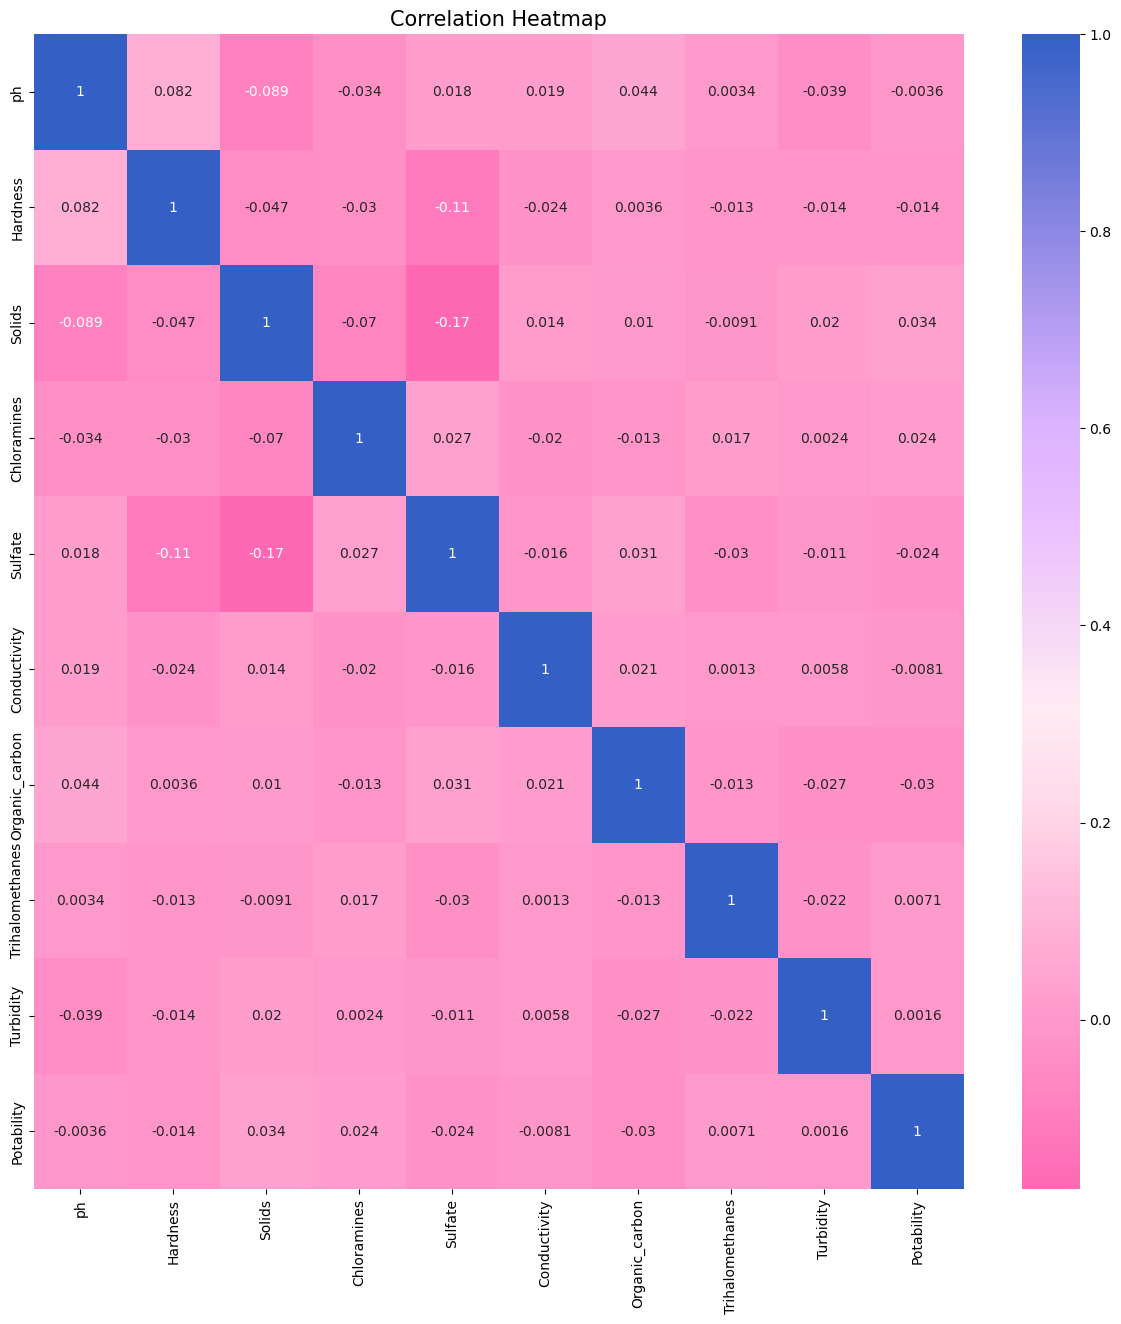

In [20]:

# Create a custom colormap
pink_cmap = LinearSegmentedColormap.from_list('pink_cmap', colors_pink)
colors_pink_blue = ["#ff69b4", "#ff85c1", "#ff9fce", "#ffbadb", "#ffdae8", "#ffebf3", "#f4d4f7", "#e9beff", "#dab2ff", "#b59df2", "#8b87e3", "#5f73d4", "#3460c6"]
pink_blue_cmap = LinearSegmentedColormap.from_list('pink_blue_cmap', colors_pink_blue)

# Define the function to plot the correlation heatmap
def correlation_heatmap(df):
    plt.figure(figsize=(15, 15))
    sns.heatmap(df.corr(), annot=True, cmap=pink_blue_cmap, annot_kws={"fontsize": 10})
    plt.title('Correlation Heatmap', fontdict={'fontsize': 15})
    plt.show()

# Call the function with your DataFrame
correlation_heatmap(df)


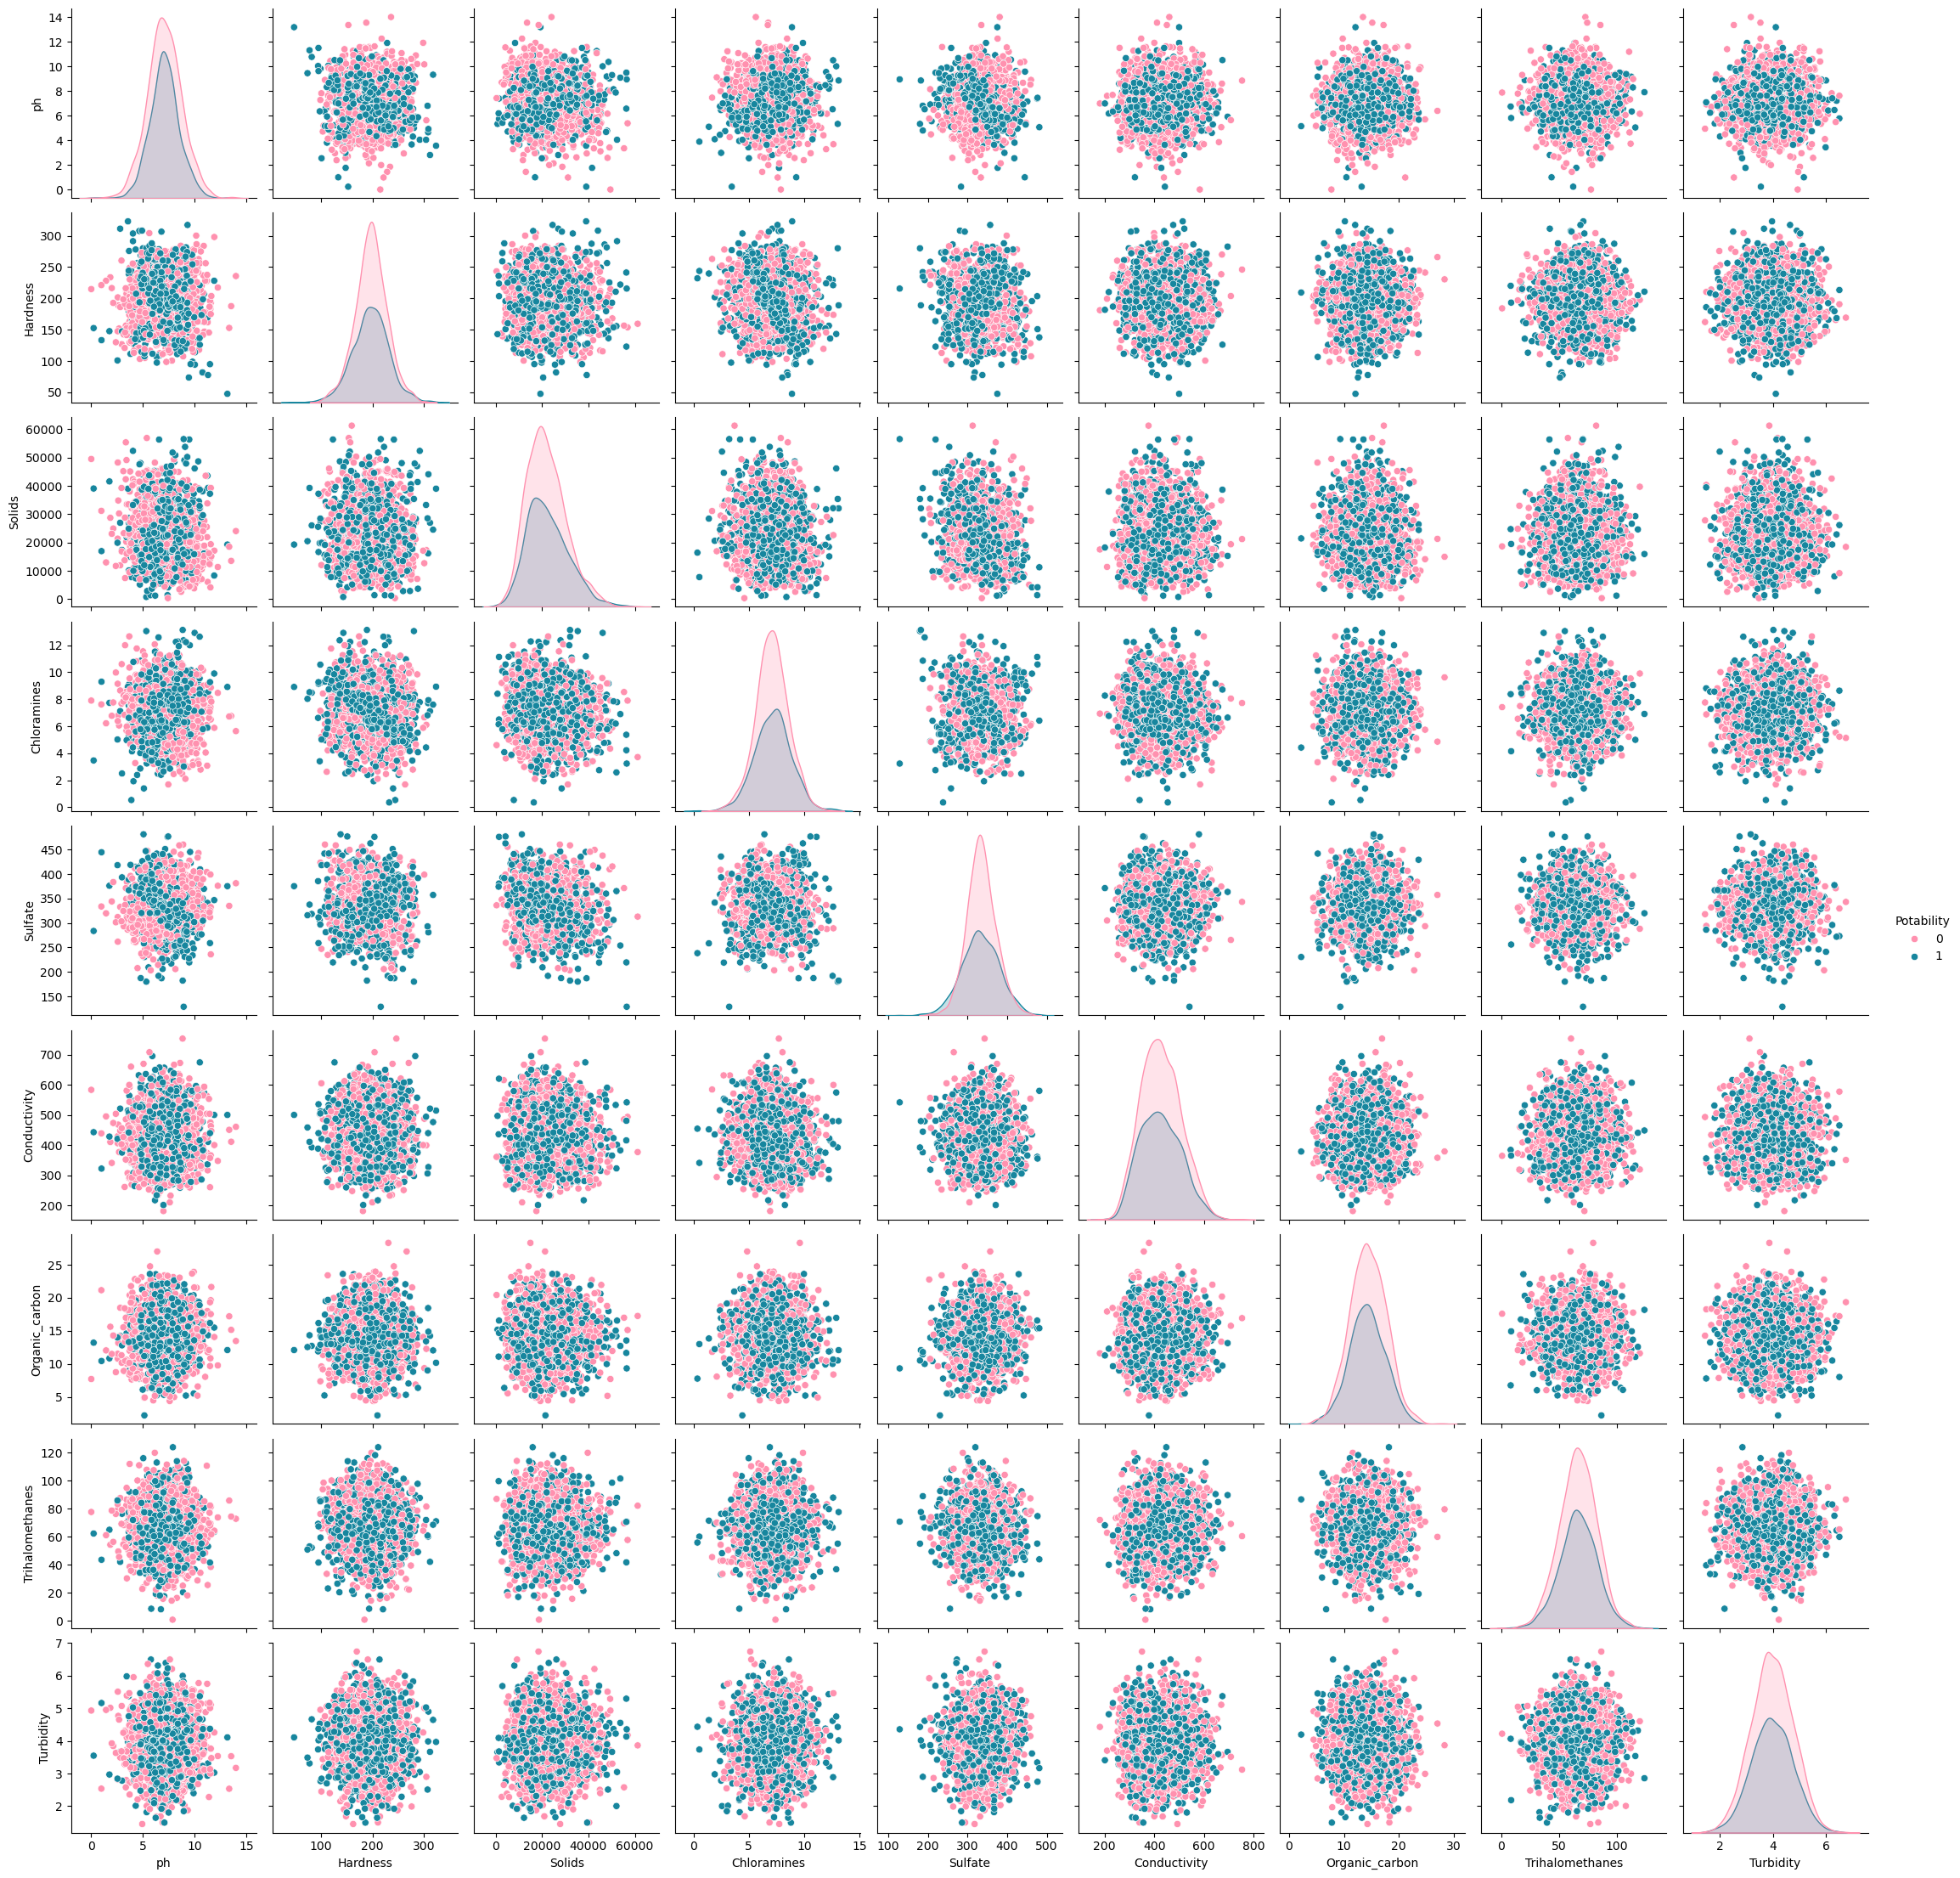

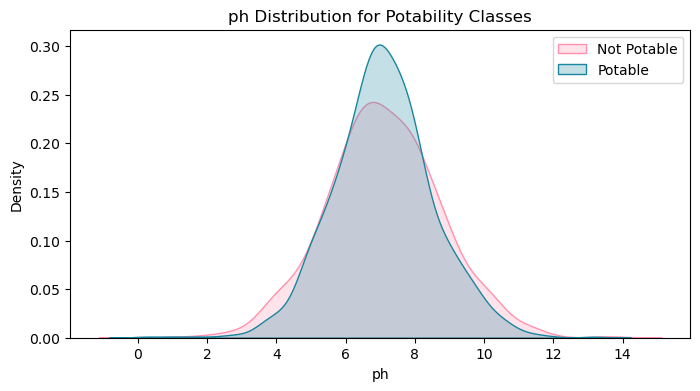

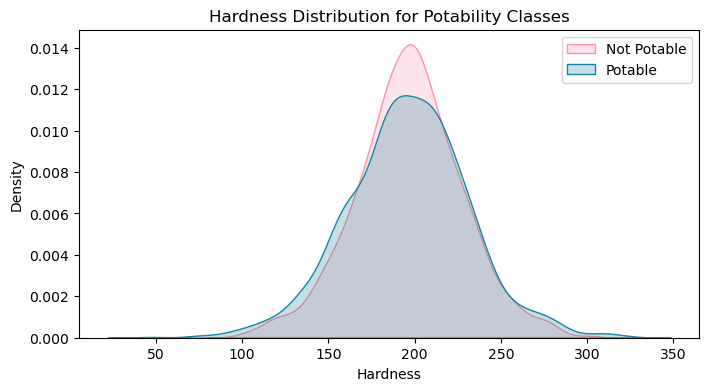

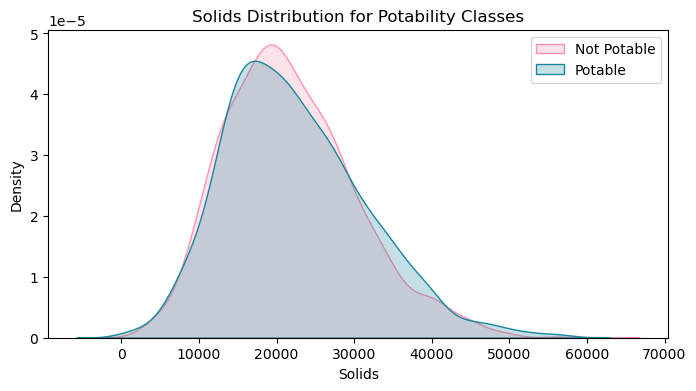

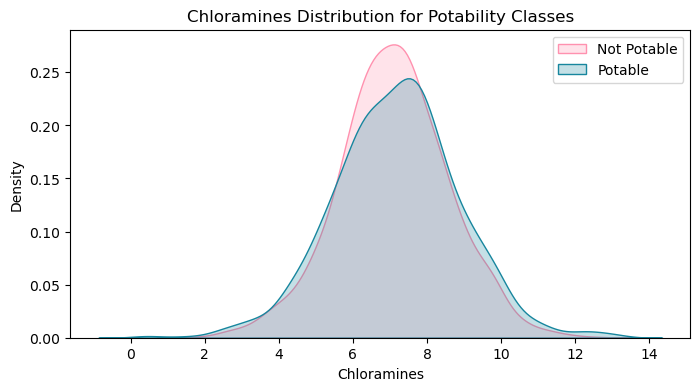

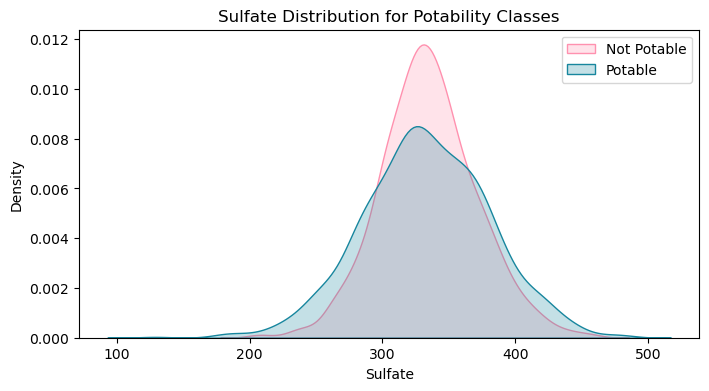

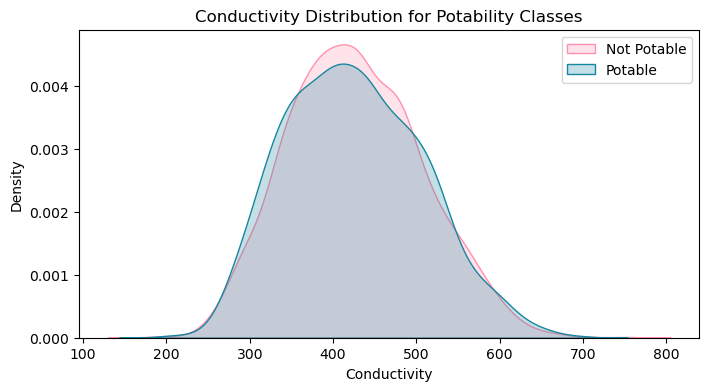

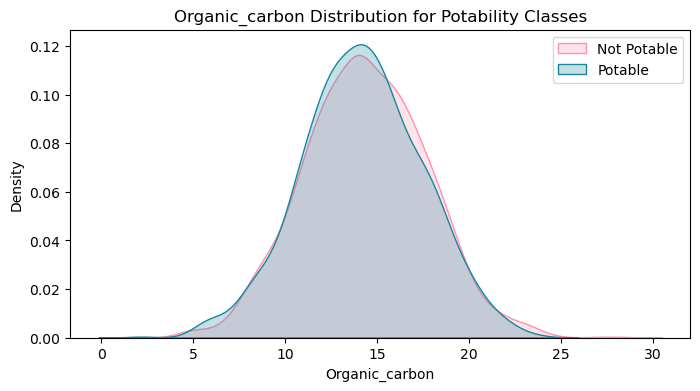

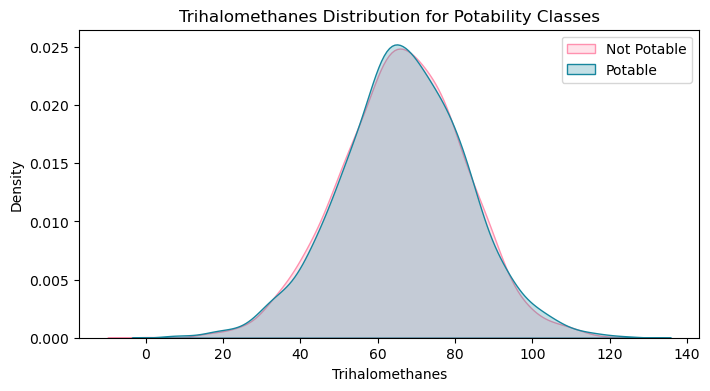

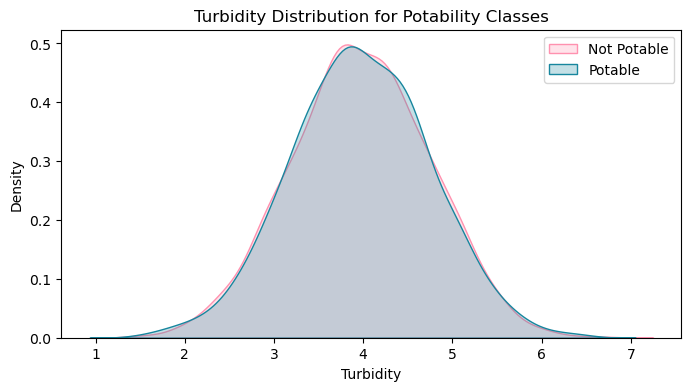

In [21]:
# Scatter plot matrix to observe interactions between features
sns.pairplot(df, hue="Potability", diag_kind="kde",  palette=[colors_pink[3], colors_blue[2]])
plt.show()

# Comparing feature distributions for Potability (0 vs 1)
for column in df.columns[:-1]:  # excluding 'Potability'
    plt.figure(figsize=(8, 4), )
    sns.kdeplot(df[column][df['Potability'] == 0], label='Not Potable', fill=True,  color= colors_pink[3])
    sns.kdeplot(df[column][df['Potability'] == 1], label='Potable', fill=True,  color=colors_blue[2])
    plt.title(f'{column} Distribution for Potability Classes')
    plt.legend()
    plt.show()

DATA PREPPING

1- Missing Values

Missing Data:
ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Missing Data Percentage:
ph                 14.987790
Hardness            0.000000
Solids              0.000000
Chloramines         0.000000
Sulfate            23.840049
Conductivity        0.000000
Organic_carbon      0.000000
Trihalomethanes     4.945055
Turbidity           0.000000
Potability          0.000000
dtype: float64


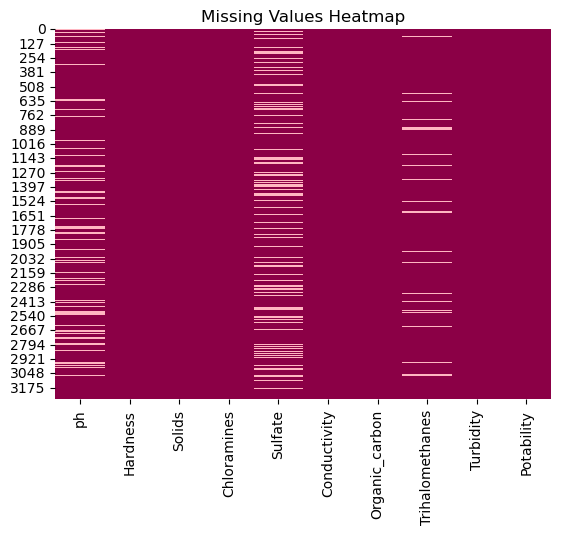

In [22]:
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

print("Missing Data:")
print(missing_data)
print("\nMissing Data Percentage:")
print(missing_percentage)


# Visualizing missing data
sns.heatmap(df.isnull(), cbar=False, cmap=pink_cmap)
plt.title("Missing Values Heatmap")
plt.show()


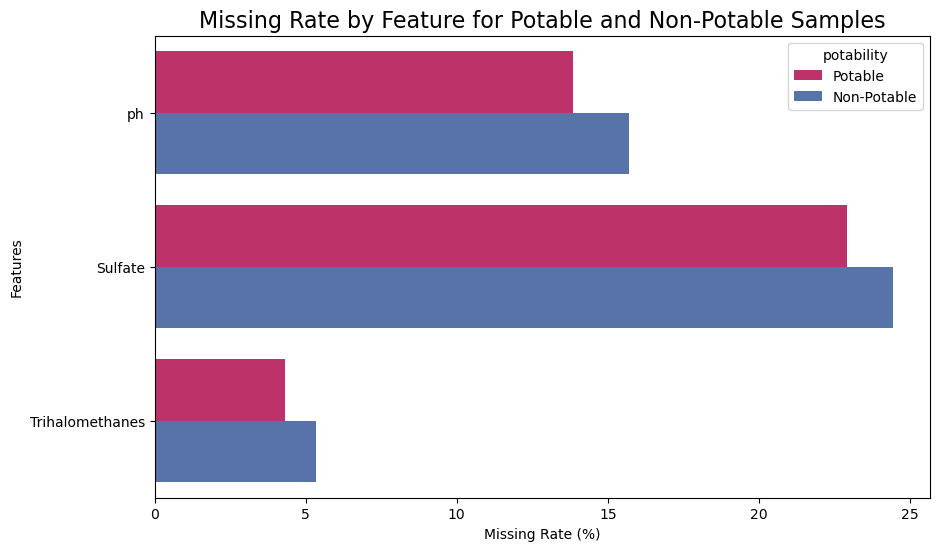

In [23]:
# Separate potable and non-potable samples
potable_samples = df[df['Potability'] == 1]
non_potable_samples = df[df['Potability'] == 0]

# Calculate missing percentages for potable samples
missing_potable = potable_samples.isnull().sum() / len(potable_samples) * 100
missing_potable = missing_potable[missing_potable > 0]  # Filter out features with no missing data

# Calculate missing percentages for non-potable samples
missing_non_potable = non_potable_samples.isnull().sum() / len(non_potable_samples) * 100
missing_non_potable = missing_non_potable[missing_non_potable > 0]  # Filter out features with no missing data

# Create dataframes for plotting
missing_potable_df = pd.DataFrame({
    'variable': missing_potable.index,
    'missing_rate': missing_potable.values,
    'potability': 'Potable'
})

missing_non_potable_df = pd.DataFrame({
    'variable': missing_non_potable.index,
    'missing_rate': missing_non_potable.values,
    'potability': 'Non-Potable'
})

# Combine the two dataframes for plotting
missing_combined_df = pd.concat([missing_potable_df, missing_non_potable_df])

# Plot the missing rate for potable and non-potable samples individually
plt.figure(figsize=(10, 6))
sns.barplot(data=missing_combined_df, x='missing_rate', y='variable', hue='potability', palette=['#D41C64', '#4B6FB5'])

# Add labels and title
plt.title('Missing Rate by Feature for Potable and Non-Potable Samples', fontsize=16)
plt.xlabel('Missing Rate (%)')
plt.ylabel('Features')

# Show the plot
plt.show()


We notice that there are missing data in the visualization above. Those need to be adressed. There are a few ways I can go about this: removing the missing observations or replace with the median/mean...
I would rather not delete the missing data observations because that will reduce the dataset size significantly and this may harm the models we will adress later on. Therefore we will look to replace them.
I'll start by measuring the medians of potable and non-potable observations.

In [24]:
df[df['Potability']==0].describe()


ph     Hardness        Solids  Chloramines      Sulfate  \
count  1684.000000  1998.000000   1998.000000  1998.000000  1510.000000   
mean      7.085378   196.733292  21777.490788     7.092175   334.564290   
std       1.683499    31.057540   8543.068788     1.501045    36.745549   
min       0.000000    98.452931    320.942611     1.683993   203.444521   
25%       6.037723   177.823265  15663.057382     6.155640   311.264006   
50%       7.035456   197.123423  20809.618280     7.090334   333.389426   
75%       8.155510   216.120687  27006.249009     8.066462   356.853897   
max      14.000000   304.235912  61227.196008    12.653362   460.107069   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1998.000000     1998.000000      1891.000000  1998.000000      1998.0  
mean     426.730454       14.364335        66.303555     3.965800         0.0  
std       80.047317        3.334554        16.079320     0.780282         0.0  
min      181.483754        4.371899         0.738000     1.450000         0.0  
25%      368.498530       12.101057        55.706530     3.444062         0.0  
50%      422.229331       14.293508        66.542198     3.948076         0.0  
75%      480.677198       16.649485        77.277704     4.496106         0.0  
max      753.342620       28.300000       120.030077     6.739000         0.0

In [25]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median()


ph                   7.035456
Sulfate            333.389426
Trihalomethanes     66.542198
dtype: float64

In [26]:
df[df['Potability']==1].describe()


ph     Hardness        Solids  Chloramines     Sulfate  \
count  1101.000000  1278.000000   1278.000000  1278.000000  985.000000   
mean      7.073783   195.800744  22383.991018     7.169338  332.566990   
std       1.448048    35.547041   9101.010208     1.702988   47.692818   
min       0.227499    47.432000    728.750830     0.352000  129.000000   
25%       6.179312   174.330531  15668.985035     6.094134  300.763772   
50%       7.036752   196.632907  21199.386614     7.215163  331.838167   
75%       7.933068   218.003420  27973.236446     8.199261  365.941346   
max      13.175402   323.124000  56488.672413    13.127000  481.030642   

       Conductivity  Organic_carbon  Trihalomethanes    Turbidity  Potability  
count   1278.000000     1278.000000      1223.000000  1278.000000      1278.0  
mean     425.383800       14.160893        66.539684     3.968328         1.0  
std       82.048446        3.263907        16.327419     0.780842         0.0  
min      201.619737        2.200000         8.175876     1.492207         1.0  
25%      360.939023       12.033897        56.014249     3.430909         1.0  
50%      420.712729       14.162809        66.678214     3.958576         1.0  
75%      484.155911       16.356245        77.380975     4.509569         1.0  
max      695.369528       23.604298       124.000000     6.494249         1.0

In [27]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()


ph                   7.036752
Sulfate            331.838167
Trihalomethanes     66.678214
dtype: float64

We note that the difference between the median values of Potable and Non-Potable Water is minimal. So we use the overall median of each attribute to replace the missing values

In [28]:
df.fillna({'Sulfate': df['Sulfate'].median()}, inplace=True)
df.fillna({'Trihalomethanes': df['Trihalomethanes'].median()}, inplace=True)
df.fillna({'ph': df['ph'].median()}, inplace=True)


In [29]:
df.isnull().sum()


ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

And just like that, we have replaced all our null and we possess a complete dataset.

2- Outliers

I have two options:
Remove them: I am not sure about the benefit of this choice
or Keep them: if they have no bad leverages.

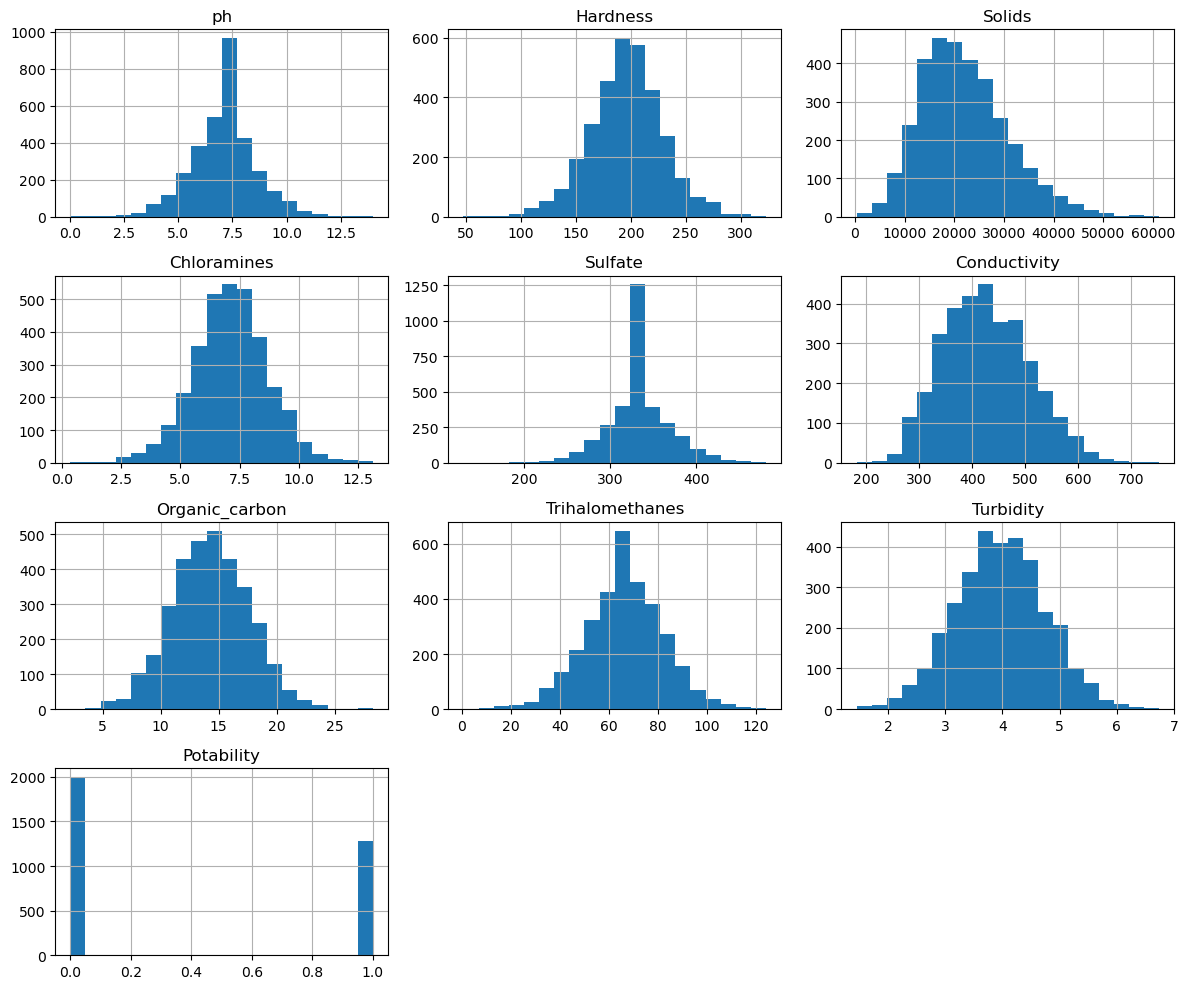

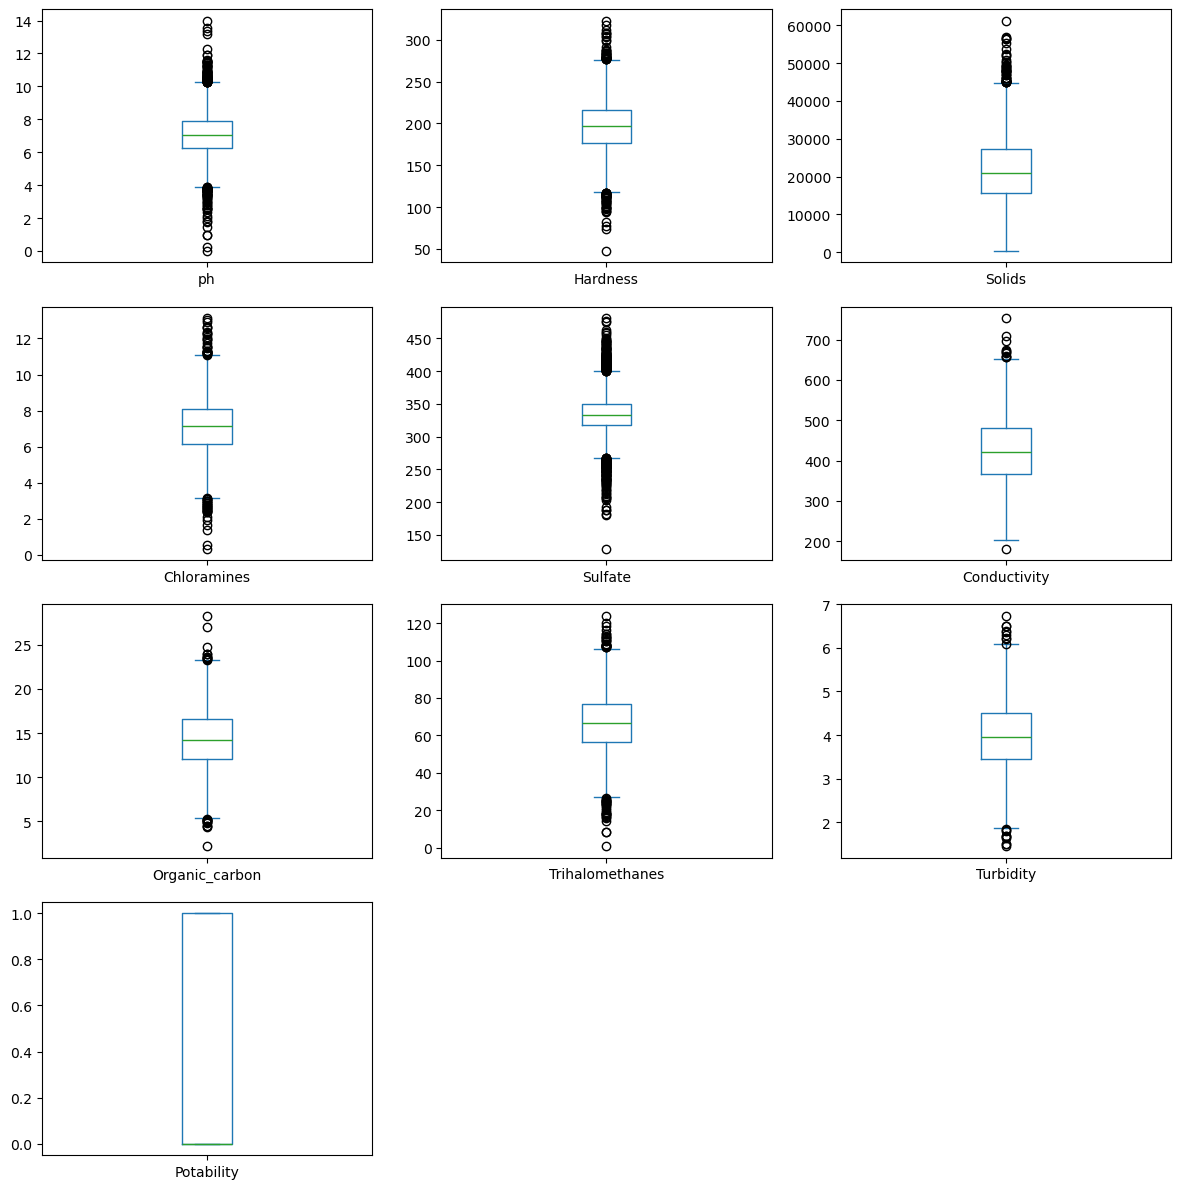

In [30]:
# Plotting histograms for each feature to visualize distribution
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

# Boxplot for each feature to detect outliers
df.plot(kind='box', subplots=True, layout=(4,3), figsize=(12,12), sharex=False, sharey=False,)
plt.tight_layout()
plt.show()


In [31]:
# #Nb of outliers in each feature

# Calculate Q1 (25th percentile) and Q3 (75th percentile) for the numerical columns
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1  # Interquartile range

# Detect outliers in the dataset using the IQR method
outliers = ((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR)))

# Count the number of outliers in each column
outlier_count = outliers.sum()

# Display the count of outliers for each column
outlier_count



ph                 142
Hardness            83
Solids              47
Chloramines         61
Sulfate            264
Conductivity        11
Organic_carbon      25
Trihalomethanes     54
Turbidity           19
Potability           0
dtype: int64

I think nothing is critical here, and the outliers, in my opinion, will not have heavy leverages as the total observations are reasonably high.
The outliers represent real-world events that might indicate water contamination or poor performance of our AWG machine, they should be kept and analyzed.


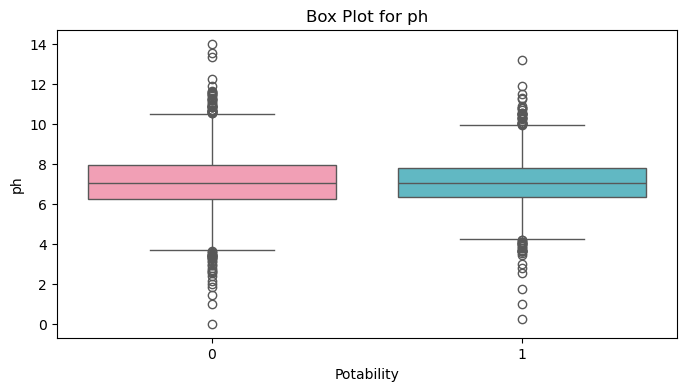

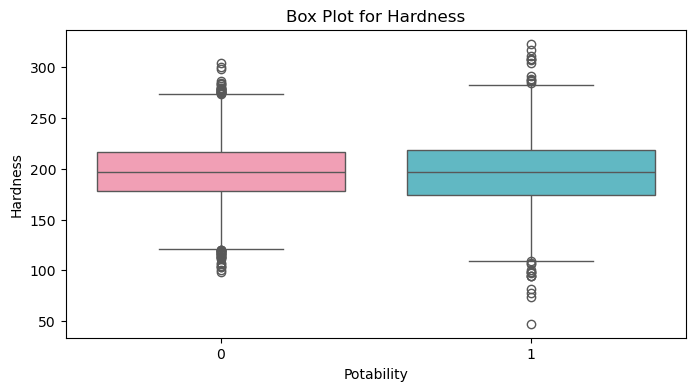

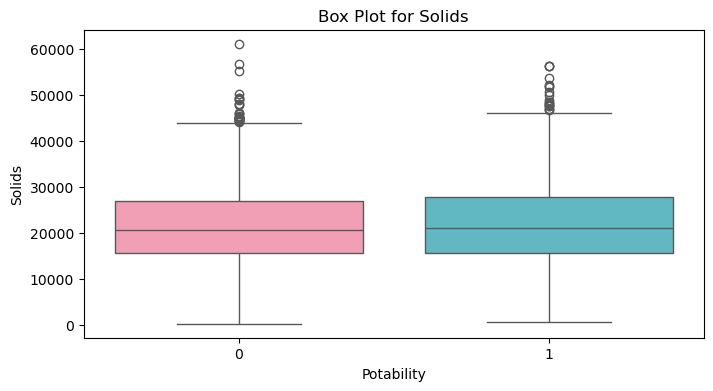

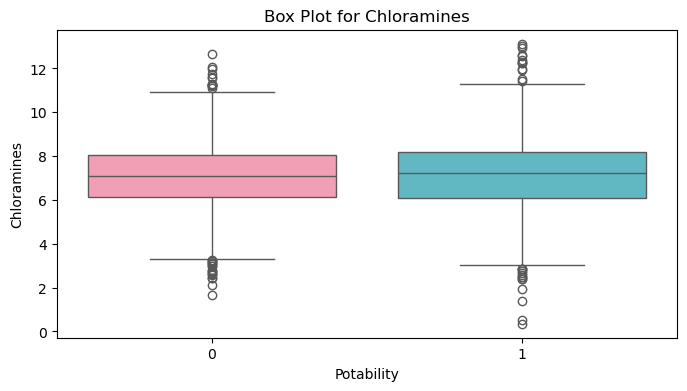

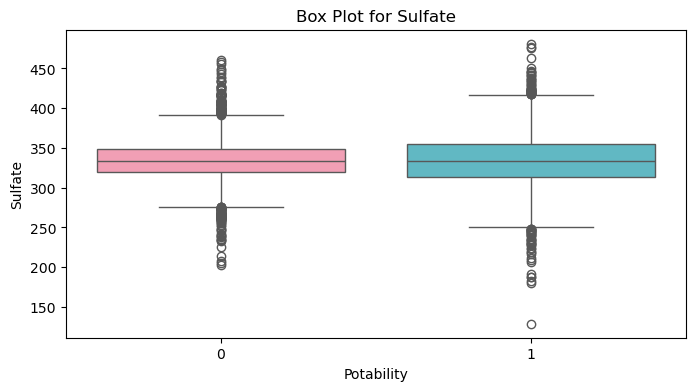

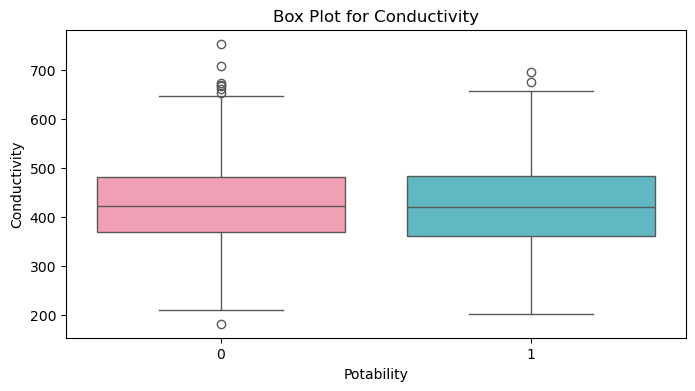

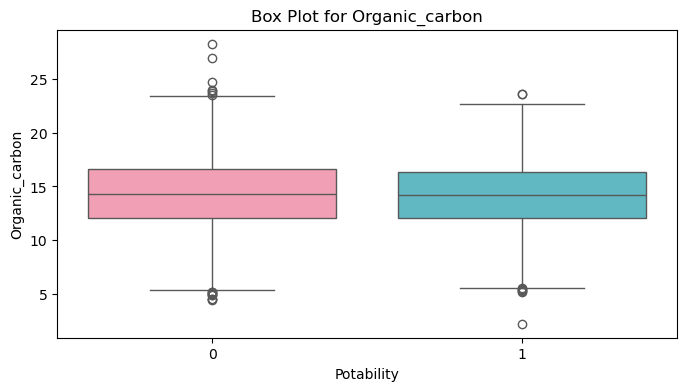

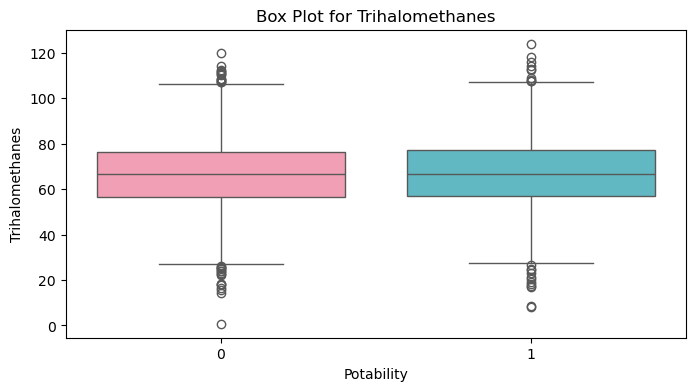

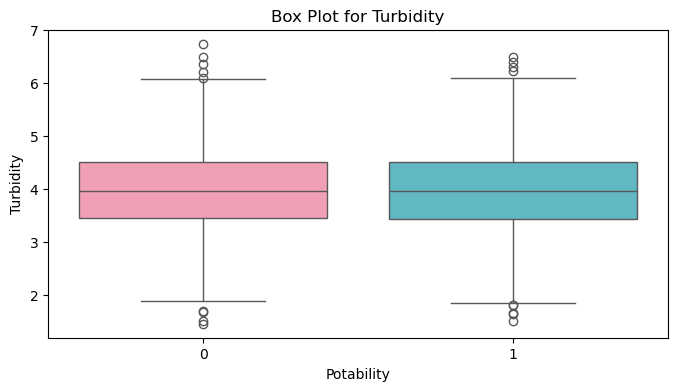

In [32]:
# Box plots for each feature to detect outliers
for column in df.columns[:-1]:  
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x="Potability", y=column, palette=[colors_pink[3], colors_blue[3]])
    plt.title(f'Box Plot for {column}')
    plt.show()



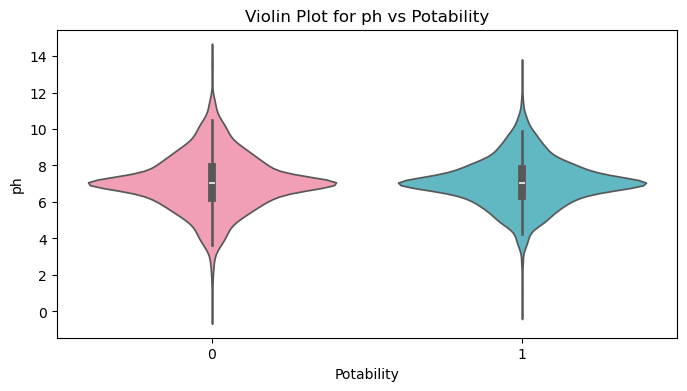

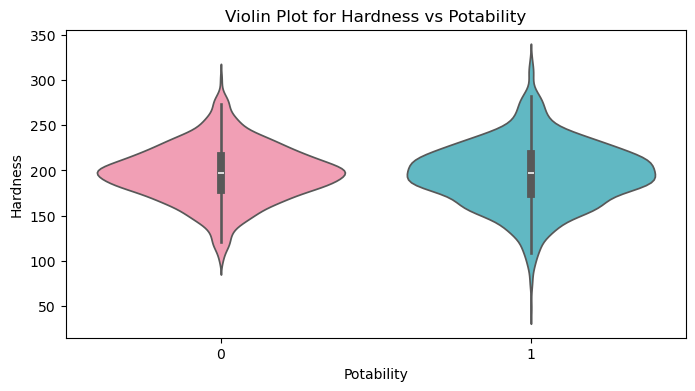

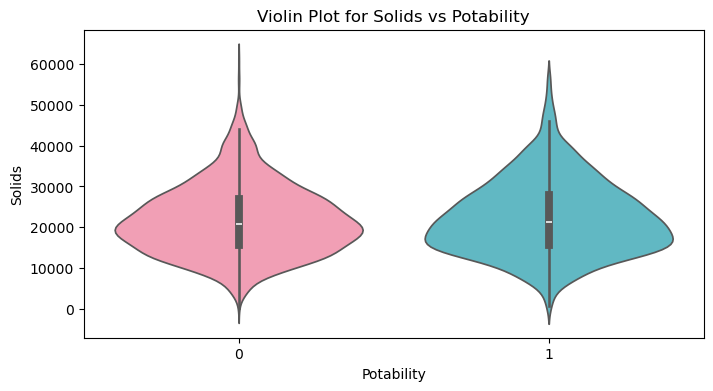

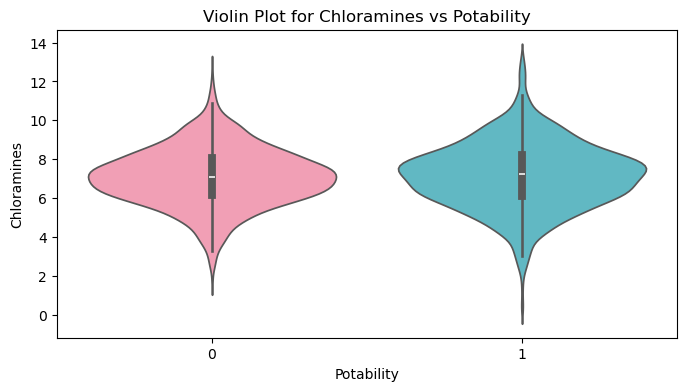

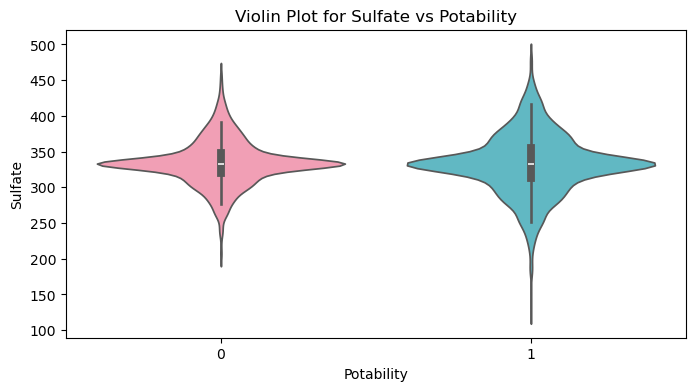

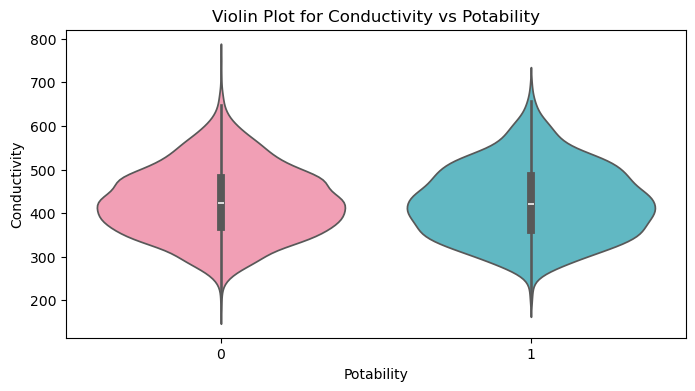

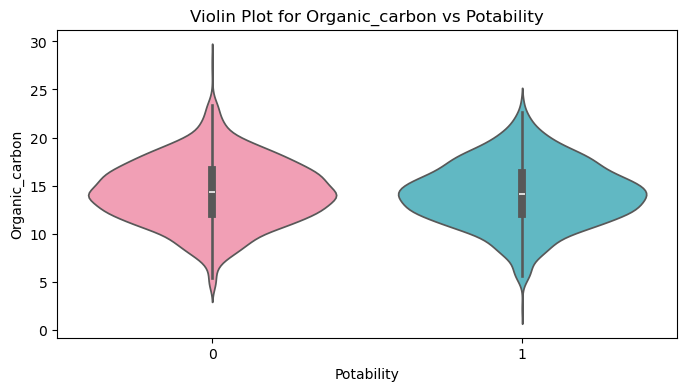

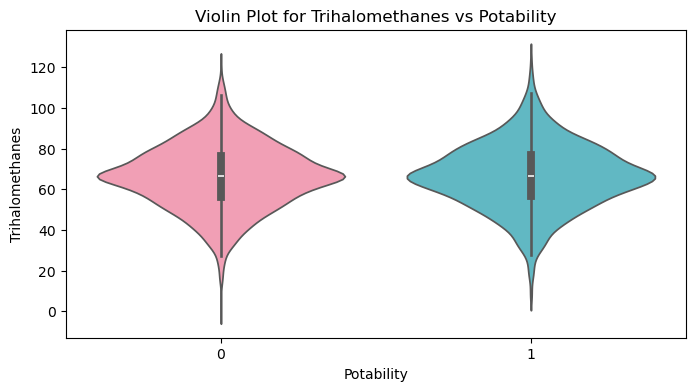

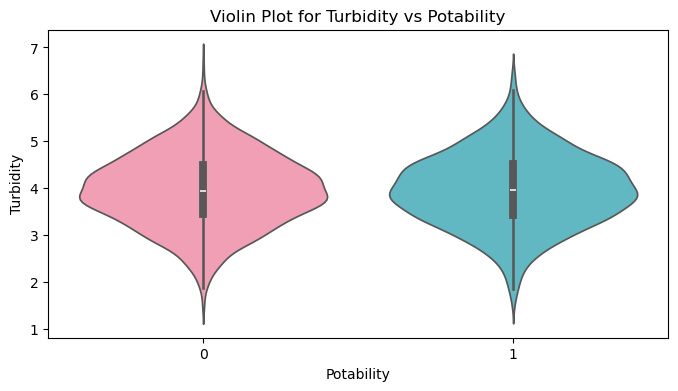

In [33]:
# Comparing Potability with individual features using box plots
for column in df.columns[:-1]: 
    plt.figure(figsize=(8, 4))
    sns.violinplot(x="Potability", y=column, data=df, palette=[colors_pink[3], colors_blue[3]])
    plt.title(f'Violin Plot for {column} vs Potability')
    plt.show()


3-Skewness: 
It measures the asymmetry of the distribution of data around its mean.

Skewness = 0: The data is perfectly symmetric (like a normal distribution).
Positive Skewness: The tail on the right side of the distribution is longer or fatter than the left side (right-skewed).
Negative Skewness: The tail on the left side of the distribution is longer or fatter than the right side (left-skewed).

In [34]:

# Calculate skewness for each numerical column
skewness_values = df.skew()

# Print skewness values
print("Skewness values:")
print(skewness_values)




Skewness values:
ph                 0.041266
Hardness          -0.039342
Solids             0.621634
Chloramines       -0.012098
Sulfate           -0.027278
Conductivity       0.264490
Organic_carbon     0.025533
Trihalomethanes   -0.087289
Turbidity         -0.007817
Potability         0.450784
dtype: float64


Values close to 0 (like pH, Hardness, Chloramines, Organic Carbon, Turbidity) suggest that these attributes are approximately symmetric.
Right skewed attributes:
    Solids (0.62): Mildly right-skewed.
    Potability (0.45): Slightly right-skewed.
    Conductivity (0.26): Slightly right-skewed.

-Potability is a binary attribute so it can only have two values 0 and 1.
- Solids and conductivity values are mainly concentrated respectively between (10 & 28K ppm) and (350 & 500 μS/cm).
Since the skewness is mild, we will proceed without any transformations.

4- Normality:  
It refers to how closely the data follows a normal (Gaussian) distribution, which is a specific symmetric distribution where the mean, median, and mode are equal & the data follows the 68-95-99.7 rule (68% of data lies within 1 standard deviation of the mean, 95% within 2, and 99.7% within 3).


- The Shapiro-Wilk Test checks if data follows a normal distribution. 
The null hypothesis H0 is that the data is normally distributed.
    p-value > 0.05: Fail to reject H0 (data is normally distributed).
    p-value < 0.05: Reject H0 (data is not normally distributed).

In [35]:
# Perform Shapiro-Wilk test for normality for each numerical column
shapiro_results = {}
for column in df.select_dtypes(include=[float, int]).columns:
    stat, p_value = shapiro(df[column].dropna())  # Drop missing values for the test
    shapiro_results[column] = {"Statistic": stat, "p-value": p_value}

# Convert Shapiro-Wilk results to a DataFrame and print them
shapiro_results_df = pd.DataFrame.from_dict(shapiro_results, orient='index')
print("\nShapiro-Wilk Test Results:")
print(shapiro_results_df)


Shapiro-Wilk Test Results:
                 Statistic       p-value
ph                0.979725  3.061880e-21
Hardness          0.995969  9.609729e-08
Solids            0.977726  2.951167e-22
Chloramines       0.996773  1.818109e-06
Sulfate           0.958988  1.797071e-29
Conductivity      0.992968  1.494154e-11
Organic_carbon    0.999523  6.251250e-01
Trihalomethanes   0.996965  3.874687e-06
Turbidity         0.999698  9.335788e-01
Potability        0.618822  5.642800e-65


Even though we notice non normal attributes, I won't be preforming any extensive normalization since it is not needed for our EDA, and the models we will proceed with are not sensitive to the scale or distribution of the data.


We will simply proceed with standardazation.

Data Standardization(Z-score normalization):
+ Dividing train and test sets.

In [36]:
X = df.drop('Potability',axis=1).values
y = df['Potability'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

The primary purpose of this code is to prepare the data for a machine learning model by splitting it into training and testing sets and scaling the features. 
Scaling helps to improve the performance and convergence of many machine learning algorithms, especially those that rely on distance measurements, such as SVMs, K-nearest neighbors, and neural networks.

Modelling

Spot checking: Spot checking is a great method to find out the baseline models for our data. It's quite easy and quick.
The precision score is calculated to evaluate the performance of the models.

In [37]:
filterwarnings('ignore')


# Define a list of models for spot-checking
models = [
    ("LR", LogisticRegression(max_iter=1000)),
    ("SVC", SVC()),
    ('KNN', KNeighborsClassifier(n_neighbors=10)),
    ("DTC", DecisionTreeClassifier()),
    ("GNB", GaussianNB()),
    ("SGDC", SGDClassifier()),
    ("Perc", Perceptron()),
    ("NC", NearestCentroid()),
    ("Ridge", RidgeClassifier()),
    ("NuSVC", NuSVC()),
    ("BNB", BernoulliNB()),
    ('RF', RandomForestClassifier()),
    ('ADA', AdaBoostClassifier()),
    ('XGB', GradientBoostingClassifier()),
    ('PAC', PassiveAggressiveClassifier()),
    ('MLP', MLPClassifier(max_iter=1000)),  # Neural network (Multi-layer Perceptron)
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')),  # XGBoost
    ('LightGBM', LGBMClassifier()),  # LightGBM
    ('CatBoost', CatBoostClassifier(verbose=0)),  # CatBoost (set verbose=0 to suppress output)
    ('Neural Network', MLPClassifier(max_iter=1000))  # Neural network (Multi-layer Perceptron)
]

# Store results
tresults = []
names = []
finalResults = []

# Train and evaluate each model
for name, model in models:
    model.fit(X_train, y_train)
    model_results = model.predict(X_test)
    score = precision_score(y_test, model_results, average='macro')
    tresults.append(score)
    names.append(name)
    finalResults.append((name, score))

# Sort the results by precision score in descending order
finalResults.sort(key=lambda k: k[1], reverse=True)

# Display sorted results
finalResults


NameError: name 'filterwarnings' is not defined

///////////////////////////////////////////////////////////////////////////////////////


We can observe through spot checking out top rated models whom we will use. However I still wish to test the linear regression model as well.

Let's study each model individually. I will be testing the following models:
Logistic Regression,
Random Forest,
Gradient Boosting XGB,
SVM : Support Vector Machine Model,
Catboost, 
LightGBM


///////////////////////// Logistic Regression

Feature selection
Recursive feature elimination

Given an external estimator that assigns weights to features, recursive feature elimination (RFE) is to select features by recursively considering smaller and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_ attribute or through a feature_importances_ attribute. Then, the least important features are pruned from current set of features.That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

In [ ]:
X_test.shape


In [ ]:
X_train.shape

In [ ]:
y_test.shape

In [ ]:
y_train.shape

In [ ]:

# Initialize and train the Logistic Regression model
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# CURVES


# Compute probabilities for ROC curve and AUC

y_pred_proba = model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#  Define the desired sensitivity (True Positive Rate)
target_sensitivity = 0.90

# Find the index where sensitivity (tpr) is greater than or equal to the target sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]

# Get the corresponding threshold, sensitivity, specificity, and false positive rate
threshold = thresholds[index]
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Display the information
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")

#  Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')

# Add the dashed line for random guessing
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add vertical and horizontal lines at the desired sensitivity and corresponding threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line (False Positive Rate)
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line (True Positive Rate)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

#  Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('ROC Curve with Optimal Threshold for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


The model predicts all samples as not potable (Potability = 0), which leads to poor performance for the potable class (Potability = 1).
This imbalance suggests that the model is not learning to distinguish between the two classes well, likely due to data imbalance or insufficient feature signal.

To address class imbalance in your logistic regression model, I will try techniques like Synthetic Minority Over-sampling Technique (SMOTE) or by adjusting the class weights directly.

Method 1: Using SMOTE: 
SMOTE is an oversampling technique that generates synthetic samples for the minority class.

Method 2: Using Class Weight: 
Adjusting class weights directly in the logistic regression model to penalize misclassifications of the minority class.

In [ ]:

### Method 1: Using SMOTE to handle class imbalance ###
# Apply SMOTE to the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Initialize and train the Logistic Regression model on SMOTE data
model_smote = LogisticRegression(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)

# Make predictions
y_pred_smote = model_smote.predict(X_test)

# Evaluate the SMOTE model
accuracy_smote = accuracy_score(y_test, y_pred_smote)
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
class_report_smote = classification_report(y_test, y_pred_smote)

# Display the results for SMOTE
print("=== SMOTE Logistic Regression Model ===")
print(f"Accuracy: {accuracy_smote * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_smote)
print("Classification Report:")
print(class_report_smote)


### Method 2: Using Class Weight to handle class imbalance ###
# Initialize and train the Logistic Regression model with balanced class weights
model_weighted = LogisticRegression(random_state=42, class_weight='balanced')
model_weighted.fit(X_train, y_train)

# Make predictions
y_pred_weighted = model_weighted.predict(X_test)

# Evaluate the weighted model
accuracy_weighted = accuracy_score(y_test, y_pred_weighted)
conf_matrix_weighted = confusion_matrix(y_test, y_pred_weighted)
class_report_weighted = classification_report(y_test, y_pred_weighted)

# Display the results for Class Weight
print("\n=== Weighted Logistic Regression Model ===")
print(f"Accuracy: {accuracy_weighted * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix_weighted)
print("Classification Report:")
print(class_report_weighted)

Both of these techniques led to a drop in the accuracy. Therefore, they are obsolete in our case.

Let's try feature engineering.

Interaction Features: Helps capture relationships between pairs of features that might be important but aren't captured by individual features.

Polynomial Features: Captures non-linear relationships, making the model more expressive.

Feature Selection: Ensures that only the most relevant features are used, which helps reduce overfitting and improves model performance.


In [ ]:


#  1. Feature Engineering: Create Interaction Features
# Create interaction terms between features
poly = PolynomialFeatures(interaction_only=True, include_bias=False)
X_train_inter = poly.fit_transform(X_train)
X_test_inter = poly.transform(X_test)

# 2. Feature Engineering: Polynomial Features
# Create polynomial features (degree 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Combine interaction and polynomial features
X_train_enhanced = np.hstack((X_train_inter, X_train_poly))
X_test_enhanced = np.hstack((X_test_inter, X_test_poly))

# 3. Feature Engineering: Feature Selection
# Recursive Feature Elimination (RFE) to select important features
log_reg = LogisticRegression(random_state=42, max_iter=500)
rfe = RFE(estimator=log_reg, n_features_to_select=6)  # You can adjust the number of features
X_train_selected = rfe.fit_transform(X_train_enhanced, y_train)
X_test_selected = rfe.transform(X_test_enhanced)




# Train the logistic regression model on selected features
model = LogisticRegression(random_state=42, max_iter=500)
model.fit(X_train_selected, y_train)

# Make predictions
y_pred = model.predict(X_test_selected)

# Evaluate the enhanced model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print("=== Enhanced Logistic Regression Model ===")
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
# CURVES after enhancing the model


# Compute probabilities for ROC curve and AUC

y_pred_proba = model.predict_proba(X_test_selected)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

#  Define the desired sensitivity (True Positive Rate)
target_sensitivity = 0.90

# Find the index where sensitivity (tpr) is greater than or equal to the target sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]

# Get the corresponding threshold, sensitivity, specificity, and false positive rate
threshold = thresholds[index]
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Display the information
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")

#  Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')

# Add the dashed line for random guessing
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add vertical and horizontal lines at the desired sensitivity and corresponding threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line (False Positive Rate)
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line (True Positive Rate)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve for Logistic Regression', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

#  Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

#  Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('ROC Curve with Optimal Threshold for Logistic Regression')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


As we can see the feature engineering led to an accuracy increase.

In [ ]:
#Most important features for LR


# Assuming `X_train` and `y_train` are your training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Convert X_train back to DataFrame to get column names
X_train_df = pd.DataFrame(X_train, columns=df.drop('Potability', axis=1).columns)

# Create a DataFrame with feature importance
feature_importance = pd.Series(model.coef_[0], index=X_train_df.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)

# Plot the feature importance
plt.figure(figsize=(12, 8))
feature_importance.plot(kind='bar', color= colors_pink[4])
plt.title('Feature Importance After Engineering')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

/////////////////////////////////

RANDOM FOREST MODEL

In [ ]:
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("\nAccuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Accuracy Score:

The accuracy score represents the proportion of correctly predicted instances compared to the total instances in the test set.
For example, if the output was Accuracy: 0.75, it means that 75% of the water samples were correctly classified as potable or non-potable by the model.
This metric gives a quick overall view of the model's performance, but it should be interpreted carefully, especially if the classes are imbalanced.
Classification Report:

The classification report provides more detailed metrics: Precision, Recall, F1-Score, and Support for each class (potable and non-potable).
Precision (Positive Predictive Value): Measures the accuracy of positive predictions. A higher precision means fewer false positives.
Example: A precision of 0.80 for potable water means that 80% of the samples predicted as potable are actually potable.
Recall (Sensitivity or True Positive Rate): Measures the ability to identify all actual positive instances. A higher recall means fewer false negatives.
Example: A recall of 0.70 for potable water indicates that the model correctly identifies 70% of the actual potable water samples.
F1-Score: The harmonic mean of precision and recall. It balances the two metrics and is useful when dealing with class imbalances.
Example: A high F1-score indicates a balance between precision and recall.
Support: The number of true instances for each class in the test set.
Confusion Matrix:

The confusion matrix visually represents the model's performance by showing the counts of true positives, true negatives, false positives, and false negatives.
Interpretation of the Matrix:
True Positives (TP): Correctly predicted potable samples.
True Negatives (TN): Correctly predicted non-potable samples.
False Positives (FP): Samples predicted as potable but are actually non-potable (Type I error).
False Negatives (FN): Samples predicted as non-potable but are actually potable (Type II error).
A high number of TP and TN with low FP and FN indicates good model performance.

In [ ]:
# Predict probabilities for the test set
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Define a desired sensitivity (for example, 0.90)
target_sensitivity = 0.90

# Find the threshold corresponding to the desired sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]
threshold = thresholds[index]

# Get the corresponding sensitivity, specificity, and false positive rate
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Print the selected threshold, sensitivity, and specificity
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing

# Add vertical and horizontal lines for the selected threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line at selected FPR
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line at selected TPR

# Labels and title
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver operating characteristic (ROC) curve with selected threshold (Random Forest)', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

# Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve with optimal threshold (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

To better improve the model, I will try model tuning using RandomizedSearchCV, while addressing class imbalance with Synthetic Minority Over-sampling Technique (SMOTE) to help balance the classes by generating synthetic samples.

In [ ]:
# Define Random Forest model with parameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Randomized Search with Cross-Validation
rf = RandomForestClassifier(random_state=42)
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Best parameters from RandomizedSearchCV
best_rf = random_search.best_estimator_

# Predict on test set
y_pred = best_rf.predict(X_test)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred)}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")

In [ ]:
# Predict probabilities for the test set
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_rf)
roc_auc = auc(fpr, tpr)

# Define a desired sensitivity (for example, 0.90)
target_sensitivity = 0.90

# Find the threshold corresponding to the desired sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]
threshold = thresholds[index]

# Get the corresponding sensitivity, specificity, and false positive rate
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Print the selected threshold, sensitivity, and specificity
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing

# Add vertical and horizontal lines for the selected threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line at selected FPR
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line at selected TPR

# Labels and title
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver operating characteristic (ROC) curve with selected threshold (Random Forest)', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

# Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve with optimal threshold (Random Forest)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Display confusion matrix

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

We can see that the accuracy slightly increased.////

///////////////////////////////////////////////
SVC MODEL

In [ ]:
# Trying to optimize svc params


# Create a pipeline with StandardScaler and SVC
svc_model = Pipeline([
    ('scaler', StandardScaler()),  # Step 1: Scale the features
    ('svc', SVC(kernel='linear'))  # Step 2: Train the SVC model
])

# Train the SVC model
svc_model.fit(X_train, y_train)

# Predict on the test set
y_pred = svc_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Model Evaluation
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}\n")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}\n")
print(f"Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}\n")


In [ ]:

# Define the pipeline steps
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('svc', SVC(random_state=42))
])

# Define hyperparameters to search for the SVC model
param_grid = {
    'svc__kernel': ['linear', 'rbf'],  # Try both linear and RBF kernel
    'svc__C': [0.1, 1, 10]  # Try different values of regularization
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)

# Make predictions on the test set using the best model
y_pred = grid_search.predict(X_test)

# Evaluate the model using accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


Final Model:
This code explores a wide range of hyperparameters with RandomizedSearchCV and then fine-tunes the SVC model with GridSearchCV. The final SVC model is returned with the optimal hyperparameters. -->

In [ ]:

# 1- Define the pipeline with scaling and SVC model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Scaling the features
    ('svc', SVC(random_state=42))  # Support Vector Classifier
])

# 2- RandomizedSearchCV for broad hyperparameter exploration
param_dist = {
    'svc__kernel': ['linear', 'rbf'],  # Try both linear and RBF kernels
    'svc__C': stats.uniform(0.1, 100),  # Uniform distribution for C (regularization parameter)
    'svc__gamma': ['scale', 'auto', 0.1, 1, 10]  # Gamma for RBF kernel
}

# Perform RandomizedSearchCV to explore the hyperparameter space
random_search = RandomizedSearchCV(pipeline, param_dist, n_iter=50, cv=5, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and cross-validation accuracy from RandomizedSearchCV
print("Best Parameters from Randomized Search:", random_search.best_params_)
print("Best Cross-Validation Accuracy from Randomized Search:", random_search.best_score_)

# 3- Use the best hyperparameters to narrow down the grid for fine-tuning with GridSearchCV
best_params = random_search.best_params_

# Narrow down the search space based on RandomizedSearchCV results
param_grid = {
    'svc__kernel': [best_params['svc__kernel']],  # Use the best kernel
    'svc__C': [best_params['svc__C'] * 0.5, best_params['svc__C'], best_params['svc__C'] * 2],  # Fine-tuning C
    'svc__gamma': [best_params['svc__gamma']] if best_params['svc__kernel'] == 'linear' else [best_params['svc__gamma'] * 0.5, best_params['svc__gamma'], best_params['svc__gamma'] * 2]  # Fine-tuning gamma for RBF
}

# Perform GridSearchCV to fine-tune the model
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best parameters from GridSearchCV
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Accuracy from Grid Search:", grid_search.best_score_)

# 4- Use the best model from GridSearchCV to make predictions
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate the model on the test set
accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")
print(f"Classification Report:\n{classification_report(y_test, y_pred)}")

# Return the best model (SVC with the best hyperparameters)
svc_model = best_model
svc_model

In [ ]:
# Compute ROC curve

# Predict decision function scores for the test set (used for SVC instead of predict_proba)
y_pred_decision = svc_model.decision_function(X_test)  # Get decision function scores

# Compute ROC curve and AUC using decision function scores
fpr, tpr, thresholds = roc_curve(y_test, y_pred_decision)
roc_auc = auc(fpr, tpr)

# Define the desired sensitivity (True Positive Rate)
target_sensitivity = 0.90

# Find the index where sensitivity (tpr) is greater than or equal to the target sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]

# Get the corresponding threshold, sensitivity, specificity, and false positive rate
threshold = thresholds[index]
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Display the information
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.") 

# Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')

# Add the dashed line for random guessing
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add vertical and horizontal lines at the desired sensitivity and corresponding threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line (False Positive Rate)
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line (True Positive Rate)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver operating characteristic (ROC) curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

# Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve with optimal threshold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

//////////////////////////////////// XGB Model

In [ ]:

# Initialize the XGBoost classifier
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred = xgb_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

In [ ]:
# Compute ROC curve

# Predict probabilities for the test set
y_pred_proba_xgboost = xgb_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_xgboost)
roc_auc = auc(fpr, tpr)

# Define the desired sensitivity (True Positive Rate)
target_sensitivity = 0.90

# Find the index where sensitivity (tpr) is greater than or equal to the target sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]

# Get the corresponding threshold, sensitivity, specificity, and false positive rate
threshold = thresholds[index]
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Display the information
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")


# Plot the ROC curve

plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')

# Add the dashed line for random guessing
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add vertical and horizontal lines at the desired sensitivity and corresponding threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line (False Positive Rate)
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line (True Positive Rate)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver operating characteristic (ROC) curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()




# Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

# Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve with optimal threshold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

Youden’s Index balances both sensitivity and specificity. It finds a threshold where the model is good at detecting both diseased and healthy people. This is a more general approach.

Formula:
J=Sensitivity+Specificity−1

In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [ ]:

# Dictionary to store accuracies
accuracy_results = {}

# 1. Baseline XGBoost Model
xgb_model_baseline = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_baseline.fit(X_train, y_train)
y_pred_baseline = xgb_model_baseline.predict(X_test)
accuracy_baseline = accuracy_score(y_test, y_pred_baseline)
accuracy_results['Baseline XGBoost'] = accuracy_baseline

# 2. XGBoost with Missing Data Handling (Imputation)
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

xgb_model_imputed = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_imputed.fit(X_train_imputed, y_train)
y_pred_imputed = xgb_model_imputed.predict(X_test_imputed)
accuracy_imputed = accuracy_score(y_test, y_pred_imputed)
accuracy_results['XGBoost with Imputation'] = accuracy_imputed

# 3. XGBoost with SMOTE for Imbalanced Classes
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

xgb_model_smote = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = xgb_model_smote.predict(X_test)
accuracy_smote = accuracy_score(y_test, y_pred_smote)
accuracy_results['XGBoost with SMOTE'] = accuracy_smote

# 4. XGBoost with Hyperparameter Tuning
xgb_model_tuned = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', max_depth=5, n_estimators=300, learning_rate=0.1, random_state=42)
xgb_model_tuned.fit(X_train, y_train)
y_pred_tuned = xgb_model_tuned.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
accuracy_results['XGBoost with Tuning'] = accuracy_tuned

# Print all accuracies for comparison
for model_version, accuracy in accuracy_results.items():
    print(f"{model_version}: Accuracy = {accuracy * 100:.2f}%")

/////////////////Catboost

Advanced Hyperparameter Optimization using Optuna, which is a library that uses Bayesian optimization to find the best hyperparameters more efficiently

In [ ]:

# Define the objective function for Optuna
def objective(trial):
    param = {
        'depth': trial.suggest_int('depth', 4, 10),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.2),
        'iterations': trial.suggest_int('iterations', 100, 1000),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'bagging_temperature': trial.suggest_float('bagging_temperature', 0, 1),
        'random_strength': trial.suggest_int('random_strength', 1, 20),
        'random_state': 42,
        'verbose': 0
    }
    
    # Train CatBoost
    model = cb.CatBoostClassifier(**param)
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Return the accuracy score for optimization
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Initialize Optuna study
study = optuna.create_study(direction='maximize')

# Run the optimization
study.optimize(objective, n_trials=100)

# Get the best parameters and score
print(f"Best Parameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value}")


Hyperparameter tuning Randomized Search

In [ ]:

# Define the parameter distribution for random search
param_dist = {
    'depth': np.arange(4, 11, 1),
    'learning_rate': np.linspace(0.01, 0.3, 10),
    'iterations': np.arange(100, 1001, 100),
    'l2_leaf_reg': np.arange(1, 10, 2)
}

# Initialize CatBoostClassifier
catboost_model = cb.CatBoostClassifier(verbose=0, random_state=42)

# Initialize RandomizedSearchCV with 5-fold cross-validation
random_search = RandomizedSearchCV(estimator=catboost_model, param_distributions=param_dist, 
                                   n_iter=50, cv=5, scoring='accuracy', n_jobs=-1, verbose=1, random_state=42)

# Fit the model
random_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {random_search.best_params_}")

# Get the best estimator (model)
best_model = random_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy * 100:.2f}%")


Hyperparameter tuning Grid Search

In [ ]:


# Define the parameter grid to search
param_grid = {
    'depth': [4, 6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'iterations': [100, 200, 300],
    'l2_leaf_reg': [1, 3, 5, 7],
}

# Initialize CatBoostClassifier
catboost_model = cb.CatBoostClassifier(verbose=0, random_state=42)

# Initialize GridSearchCV with 5-fold cross-validation
grid_search = GridSearchCV(estimator=catboost_model, param_grid=param_grid, 
                           cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

# Fit the model
grid_search.fit(X_train, y_train)

# Get the best parameters
print(f"Best Parameters: {grid_search.best_params_}")

# Get the best estimator (model)
best_model = grid_search.best_estimator_

# Make predictions with the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy * 100:.2f}%")


After finding our best parameters according to the Optuna optimization,(Best Parameters: {'depth': 8, 'learning_rate': 0.015277968764779541, 'iterations': 930, 'l2_leaf_reg': 7.23307907874932, 'bagging_temperature': 0.3261598909887789, 'random_strength': 11}), we build our model.

In [ ]:


# Initialize the CatBoost classifier with the provided parameters
catboost_model = cb.CatBoostClassifier(
    verbose=0,
    random_state=42,
    depth=8,  # depth parameter
    learning_rate=0.015277968764779541,  # learning rate
    iterations=930,  # iterations
    l2_leaf_reg=7.23307907874932,  # L2 regularization
    bagging_temperature=0.3261598909887789,  # bagging temperature
    random_strength=11  # random strength
)

# Train the model
catboost_model.fit(X_train, y_train)

# Make predictions
y_pred = catboost_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Compute ROC curve
# Predict probabilities for the test set
y_pred_proba_catboost = catboost_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_catboost)
roc_auc = auc(fpr, tpr)

# Define the desired sensitivity (True Positive Rate)
target_sensitivity = 0.90

# Find the index where sensitivity (tpr) is greater than or equal to the target sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]

# Get the corresponding threshold, sensitivity, specificity, and false positive rate
threshold = thresholds[index]
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Display the information
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add vertical and horizontal lines at the desired sensitivity and corresponding threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver operating characteristic (ROC) curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

# Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve with optimal threshold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

///////////////////////LightGBM

Advanced Optimization with Optuna

In [ ]:


# Define the objective function
def objective(trial):
    param = {
        'num_leaves': trial.suggest_int('num_leaves', 20, 150),
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-3, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'min_child_samples': trial.suggest_int('min_child_samples', 10, 100),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-4, 1.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-4, 1.0),
        'random_state': 42
    }

    # Initialize and train LightGBM model
    model = lgb.LGBMClassifier(**param,     
                               verbose=-1  # Suppresses LightGBM's internal warnings
                                )
    model.fit(X_train, y_train)

    # Make predictions and return accuracy score
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    return accuracy

# Create an Optuna study and optimize
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=100)

# Print the best parameters and accuracy
print(f"Best Parameters: {study.best_params}")
print(f"Best Accuracy: {study.best_value}")


Hyperparameter Tuning with Grid Search

In [ ]:

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50, 70],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'reg_alpha': [0.0, 0.1, 0.5],
    'reg_lambda': [0.0, 0.1, 0.5]
}

# Initialize the LightGBM model
lightgbm_model = lgb.LGBMClassifier(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(
    estimator=lightgbm_model,
    param_grid=param_grid,
    scoring='accuracy',
    n_jobs=-1,
    cv=5,
    verbose=1
)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best Parameters from GridSearchCV: {best_params}")


Hyperparameter Tuning with Grid Search run time is too long. So we will overlook it.

Hyperparameter Tuning with Randomized Search

In [ ]:


# Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'num_leaves': np.arange(20, 150, 10),
    'max_depth': np.arange(3, 16, 2),
    'learning_rate': np.logspace(-3, 0, 10),  # From 0.001 to 1
    'n_estimators': np.arange(100, 1001, 100),
    'min_child_samples': np.arange(10, 100, 10),
    'subsample': np.linspace(0.6, 1.0, 5),
    'colsample_bytree': np.linspace(0.6, 1.0, 5),
    'reg_alpha': np.logspace(-4, 0, 5),
    'reg_lambda': np.logspace(-4, 0, 5)
}

# Initialize the LightGBM model
lightgbm_model = lgb.LGBMClassifier(random_state=42,     
                                    verbose=-1  # Suppresses LightGBM's internal warnings
                                    )

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=lightgbm_model,
    param_distributions=param_dist,
    n_iter=50,  # Number of random combinations to try
    scoring='accuracy',  # You can also use 'roc_auc', 'f1', etc.
    n_jobs=-1,  # Use all available cores
    cv=5,  # 5-fold cross-validation
    verbose=1,
    random_state=42
)

# Fit RandomizedSearchCV
random_search.fit(X_train, y_train)

# Get the best parameters
best_params = random_search.best_params_
print(f"Best Parameters: {best_params}")

# Train the model using the best parameters
lightgbm_model_best = lgb.LGBMClassifier(**best_params, random_state=42)
lightgbm_model_best.fit(X_train, y_train)

# Make predictions
y_pred = lightgbm_model_best.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy * 100:.2f}%")


After testing for best parameters by Advanced Optimization with Optuna, we obtain our best parameters: Best Parameters: {'num_leaves': 34, 'max_depth': 14, 'learning_rate': 0.027795560239866433, 'n_estimators': 628, 'min_child_samples': 100, 'subsample': 0.6830922971020865, 'colsample_bytree': 0.7849503445164047, 'reg_alpha': 0.46978733481190965, 'reg_lambda': 0.000307255145480763}
So we initialize our model accordingly.

In [ ]:


# Initialize the LightGBM classifier with the provided hyperparameters
lightgbm_model = lgb.LGBMClassifier(
    random_state=42,
    num_leaves=34,  # num_leaves parameter
    max_depth=14,  # max_depth parameter
    learning_rate=0.027795560239866433,  # learning_rate parameter
    n_estimators=628,  # n_estimators parameter
    min_child_samples=100,  # min_child_samples parameter
    subsample=0.6830922971020865,  # subsample parameter
    colsample_bytree=0.7849503445164047,  # colsample_bytree parameter
    reg_alpha=0.46978733481190965,  # reg_alpha parameter
    reg_lambda=0.000307255145480763,  # reg_lambda parameter
    verbose=-1  # Suppresses LightGBM's internal warnings
)

# Train the model
lightgbm_model.fit(X_train, y_train)

# Make predictions
y_pred = lightgbm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Display the results
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

# Compute ROC curve
# Predict probabilities for the test set
y_pred_proba_lightgbm = lightgbm_model.predict_proba(X_test)[:, 1]  # Get probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_lightgbm)
roc_auc = auc(fpr, tpr)

# Define the desired sensitivity (True Positive Rate)
target_sensitivity = 0.90

# Find the index where sensitivity (tpr) is greater than or equal to the target sensitivity
index = np.where(tpr >= target_sensitivity)[0][0]

# Get the corresponding threshold, sensitivity, specificity, and false positive rate
threshold = thresholds[index]
sensitivity = tpr[index]
specificity = 1 - fpr[index]
false_positive_rate = fpr[index] * 100

# Display the information
print(f"Using a threshold of {threshold:.3f} guarantees a sensitivity of {sensitivity:.3f} "
      f"and a specificity of {specificity:.3f}, i.e. a false positive rate of {false_positive_rate:.2f}%.")

# Plot the ROC curve
plt.figure(figsize=(8, 6))

# Plot the ROC curve
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.3f})')

# Add the dashed line for random guessing
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)

# Add vertical and horizontal lines at the desired sensitivity and corresponding threshold
plt.axvline(x=fpr[index], color='blue', linestyle='--', lw=2)  # Vertical line (False Positive Rate)
plt.axhline(y=tpr[index], color='blue', linestyle='--', lw=2)  # Horizontal line (True Positive Rate)
plt.xlabel('False Positive Rate (1 - specificity)', fontsize=12)
plt.ylabel('True Positive Rate (recall)', fontsize=12)
plt.title('Receiver operating characteristic (ROC) curve', fontsize=14)
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Compute Youden's Index (Sensitivity + Specificity - 1)
youden_index = tpr - fpr
optimal_index = np.argmax(youden_index)  # Index of the optimal threshold
optimal_threshold = thresholds[optimal_index]

# Get the corresponding sensitivity and specificity for the optimal threshold
optimal_sensitivity = tpr[optimal_index]
optimal_specificity = 1 - fpr[optimal_index]

# Print the optimal threshold, sensitivity, and specificity
print(f"Optimal threshold: {optimal_threshold:.3f}")
print(f"Sensitivity at optimal threshold: {optimal_sensitivity:.3f}")
print(f"Specificity at optimal threshold: {optimal_specificity:.3f}")

# Plot the ROC curve with the optimal threshold indicated
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (AUC = {roc_auc:.3f})')
plt.plot([0, 1], [0, 1], color='black', linestyle='--', lw=2)  # Diagonal line for random guessing
plt.axvline(x=fpr[optimal_index], color='blue', linestyle='--', lw=2)  # Vertical line at optimal FPR
plt.axhline(y=tpr[optimal_index], color='blue', linestyle='--', lw=2)  # Horizontal line at optimal TPR
plt.xlabel('False Positive Rate (1 - specificity)')
plt.ylabel('True Positive Rate (recall)')
plt.title('Receiver operating characteristic (ROC) curve with optimal threshold')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [ ]:
# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

////////////////////////////////Comparing models

In [ ]:

# Suppress all warnings
warnings.filterwarnings('ignore')

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
    "SVC": SVC(probability=True, random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Cat Boost": cb.CatBoostClassifier(
    verbose=0,
    random_state=42,
    depth=8,  # depth parameter
    learning_rate=0.015277968764779541,  # learning rate
    iterations=930,  # iterations
    l2_leaf_reg=7.23307907874932,  # L2 regularization
    bagging_temperature=0.3261598909887789,  # bagging temperature
    random_strength=11  # random strength
                                        ),
    "LightGBM":  lgb.LGBMClassifier(
    random_state=42,
    num_leaves=34,  # num_leaves parameter
    max_depth=14,  # max_depth parameter
    learning_rate=0.027795560239866433,  # learning_rate parameter
    n_estimators=628,  # n_estimators parameter
    min_child_samples=100,  # min_child_samples parameter
    subsample=0.6830922971020865,  # subsample parameter
    colsample_bytree=0.7849503445164047,  # colsample_bytree parameter
    reg_alpha=0.46978733481190965,  # reg_alpha parameter
    reg_lambda=0.000307255145480763,  # reg_lambda parameter  
    verbose=-1  # Suppresses LightGBM's internal warnings
                                    )
}

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)
    
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": cm
    }

# Evaluate each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        print(f"{metric}: {value}")
    print("-" * 30)


In [ ]:
# Extract metrics for visualization
metrics_list = []

for model_name, metrics in results.items():
    metrics_list.append({
        "Model": model_name,
        "Accuracy": metrics["Accuracy"],
        "Precision": metrics["Precision"],
        "Recall": metrics["Recall"],
        "F1 Score": metrics["F1 Score"],
        "ROC AUC": metrics["ROC AUC"]
    })

metrics_df = pd.DataFrame(metrics_list)

# Plotting the metrics using Plotly for interactivity
fig = px.bar(
    metrics_df.melt(id_vars='Model', var_name='Metric', value_name='Score'),
    x='Model', y='Score', color='Metric', barmode='group',
    hover_data={'Score': ':.2f'},  
    title='Model Comparison on Various Metrics',
    color_discrete_sequence=colors_pink 
)

fig.update_layout(
    xaxis_title='Model',
    yaxis_title='Score',
    legend_title='Metric',
    title_x=0.5,
    width=1500,  
    height=800
)

fig.show()

# Plotting confusion matrices
for model_name, cm in results.items():
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm["Confusion Matrix"], annot=True, fmt='d', cmap= "Blues")  # Custom pinkish cmap
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [ ]:

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_proba)
    cm = confusion_matrix(y_test, y_pred)

    # Precision-Recall Curve
    precision_curve, recall_curve, _ = precision_recall_curve(y_test, y_proba)
    pr_auc = auc(recall_curve, precision_curve)
    
    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc_value = auc(fpr, tpr)
    
    return {
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score": f1,
        "ROC AUC": roc_auc,
        "Confusion Matrix": cm,
        "Precision-Recall AUC": pr_auc,
        "Precision Curve": precision_curve,
        "Recall Curve": recall_curve,
        "ROC AUC Value": roc_auc_value,
        "FPR": fpr,
        "TPR": tpr
    }

# Evaluate each model
results = {}
for name, model in models.items():
    results[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

# Display results
for model_name, metrics in results.items():
    print(f"Model: {model_name}")
    for metric, value in metrics.items():
        if metric in ["Precision Curve", "Recall Curve", "FPR", "TPR"]:
            continue
        print(f"{metric}: {value}")
    print("-" * 30)

# Plot Precision-Recall curves
plt.figure(figsize=(10, 7))
for model_name, metrics in results.items():
    plt.plot(metrics["Recall Curve"], metrics["Precision Curve"], label=f"{model_name} (PR AUC = {metrics['Precision-Recall AUC']:.2f})")
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Plot ROC curves
plt.figure(figsize=(10, 7))
for model_name, metrics in results.items():
    plt.plot(metrics["FPR"], metrics["TPR"], label=f"{model_name} (ROC AUC = {metrics['ROC AUC Value']:.2f})")
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


Take into consideration: 


Imbalanced Classes: Check if the classes (potable vs. non-potable water) are balanced. Imbalanced classes can make metrics like accuracy misleading because the model might simply predict the majority class.

Importance of False Positives vs. False Negatives:

False Positives: Predicting water is potable when it is not (safety risk).
False Negatives: Predicting water is non-potable when it is safe (unnecessary waste).



To be Used Approach:
Primary Metric: Use F1 Score if you want a balanced performance between detecting true positives and avoiding false positives.
Secondary Metric: Consider ROC AUC to understand how well the model distinguishes between potable and non-potable water across different thresholds.

F1 Score: Combines precision and recall into a single score, balancing both false positives and false negatives. This is especially useful if the dataset is imbalanced or when you need to balance the importance of detecting potable water correctly and avoiding false positives.

ROC AUC (Area Under the Receiver Operating Characteristic Curve):

Measures the trade-off between the true positive rate and false positive rate.
Useful when you care about the model's ability to distinguish between classes at various thresholds.

Precision-Recall AUC:

Especially valuable in imbalanced datasets where the minority class (potable water) is of particular interest.
Focuses on the model's performance on positive cases without being influenced by true negatives.